In [816]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [817]:
df=pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [818]:
df.duplicated().sum()

1081

In [819]:
df.drop_duplicates(inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [820]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [821]:
df.fillna(0, inplace=True)
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [822]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [823]:
#get the numerical colmns in the data
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [824]:
numerical_columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


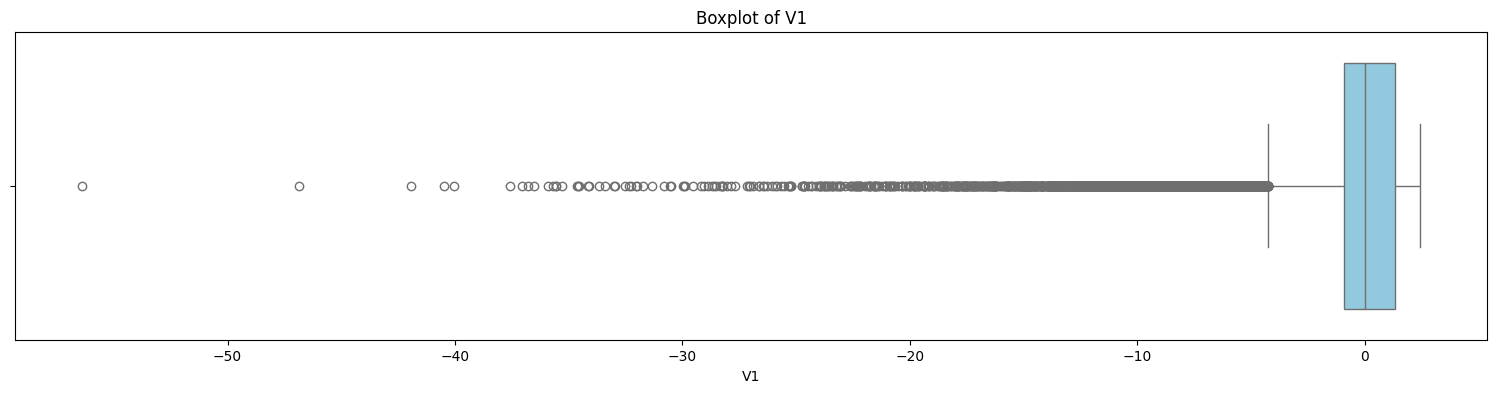

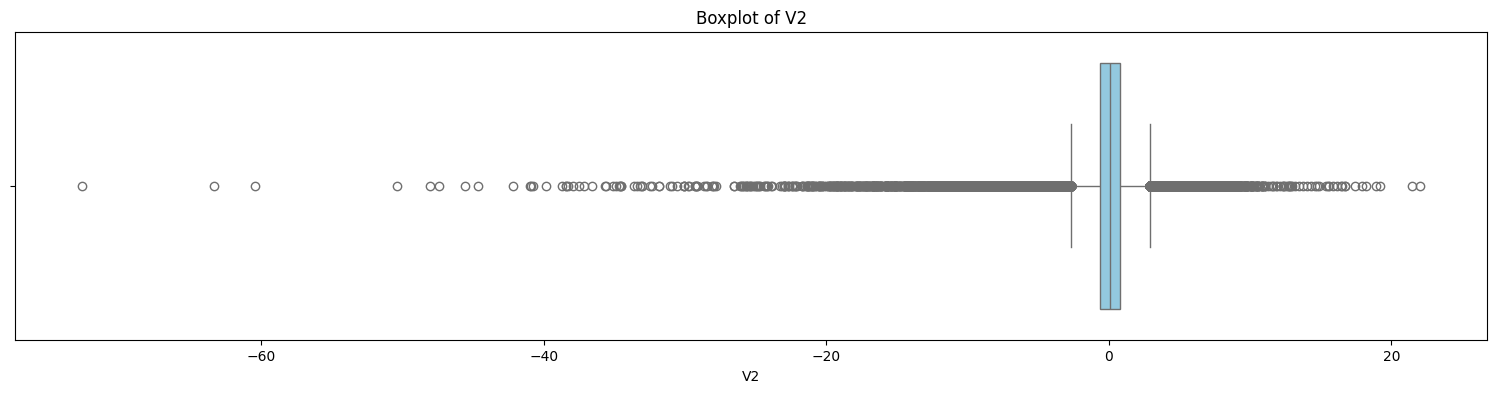

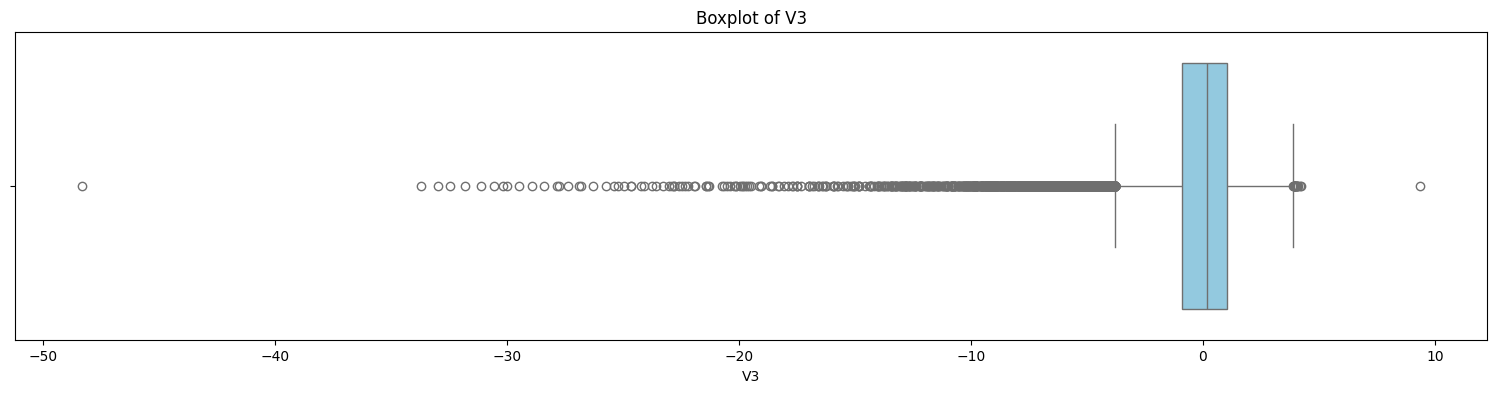

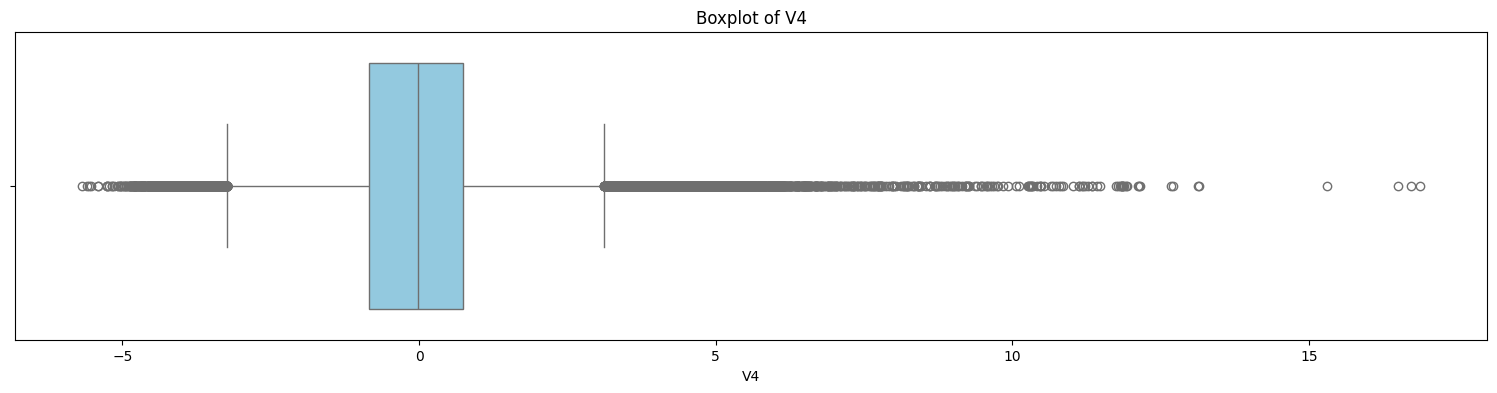

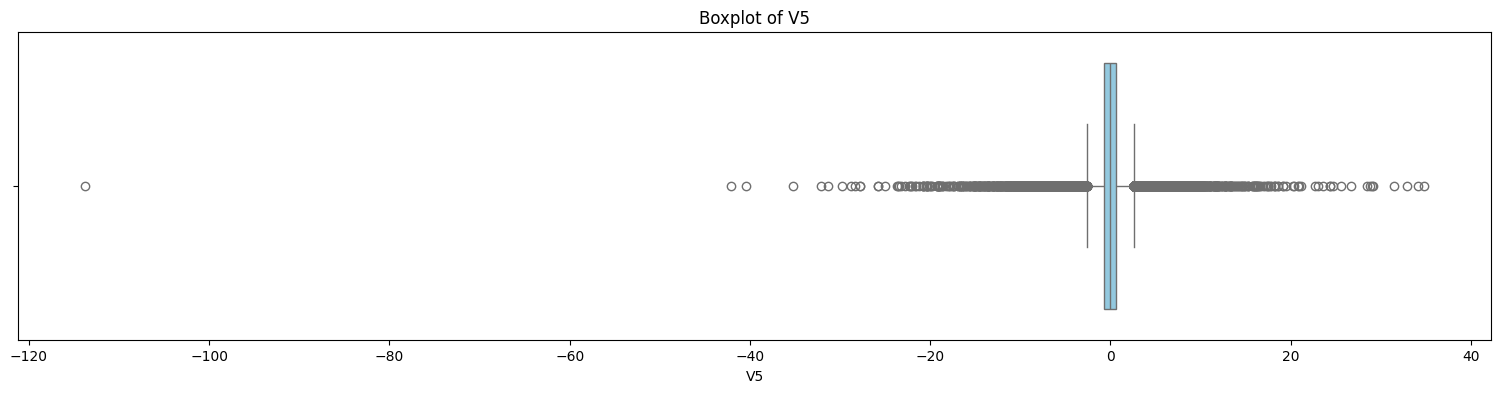

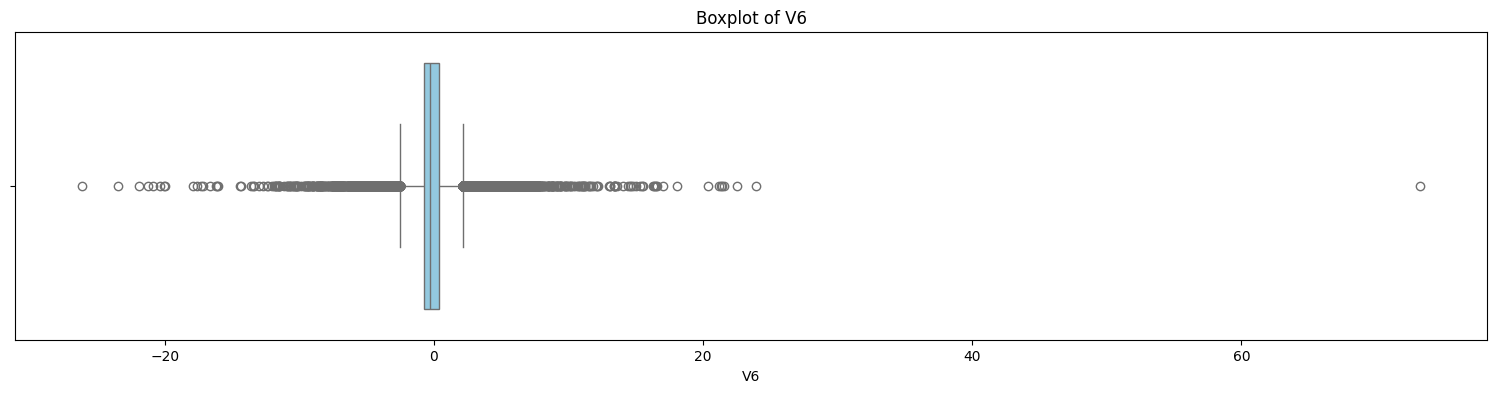

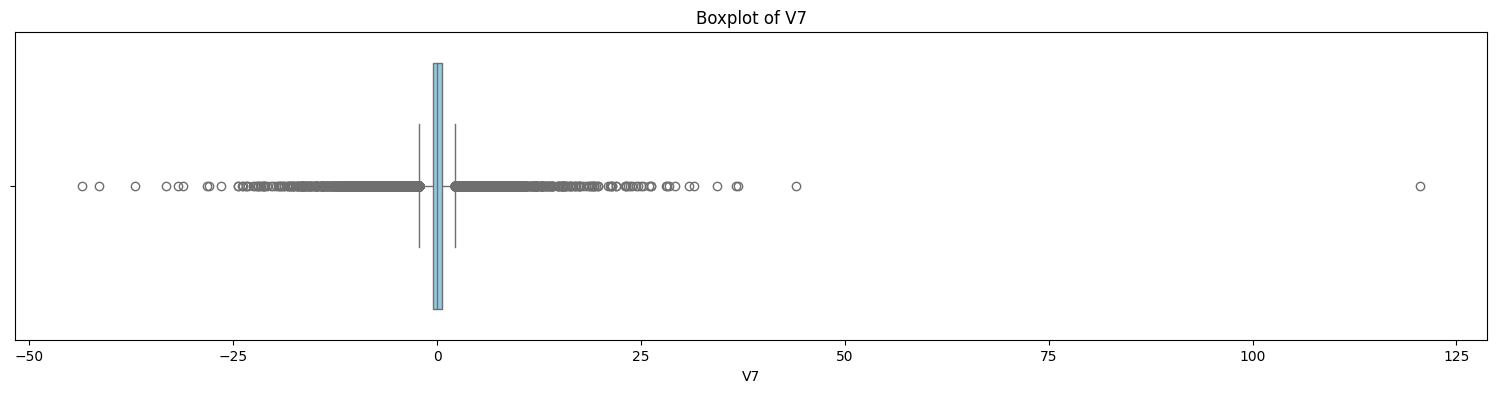

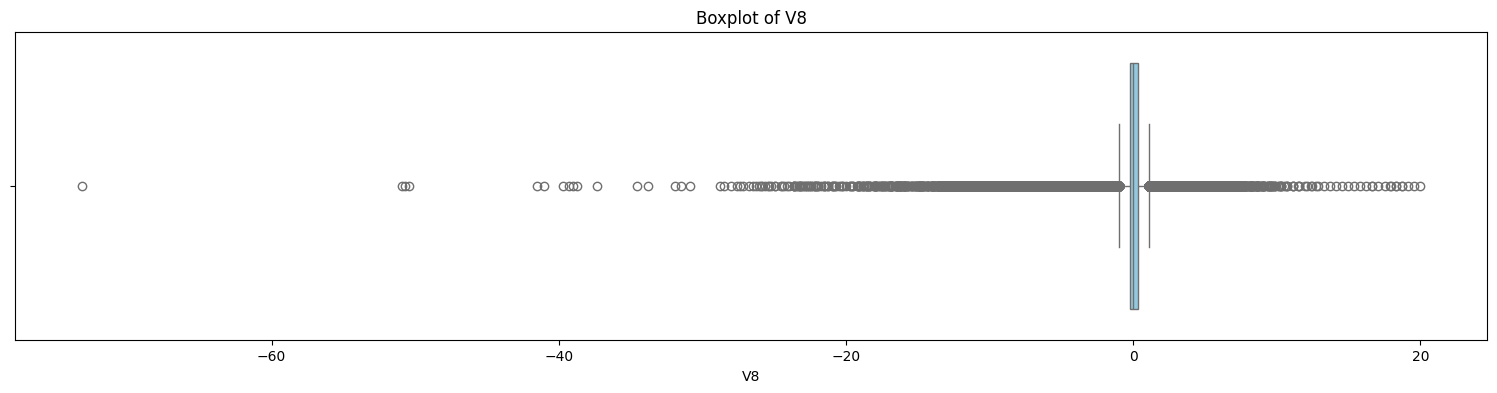

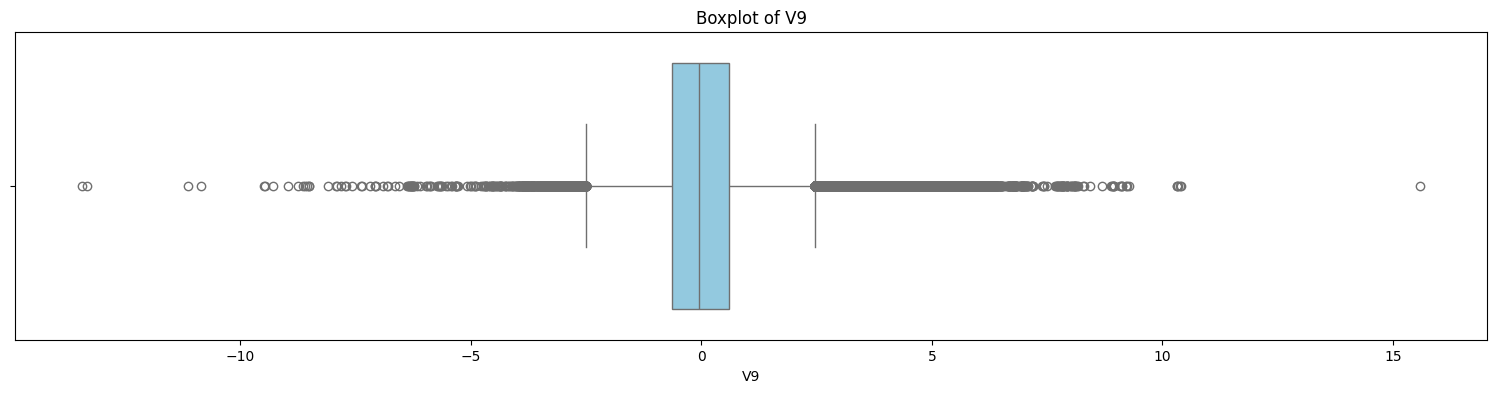

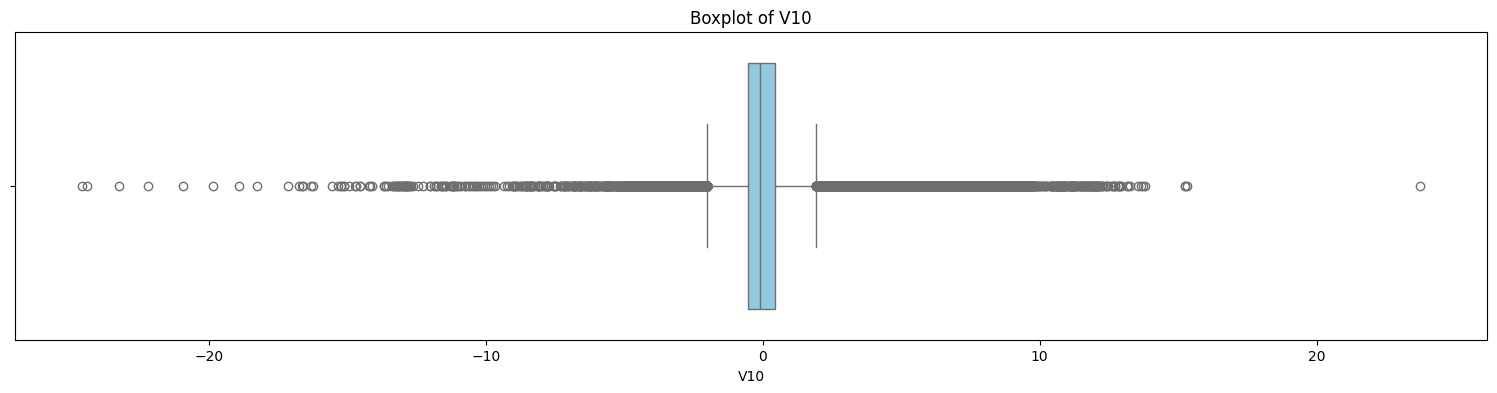

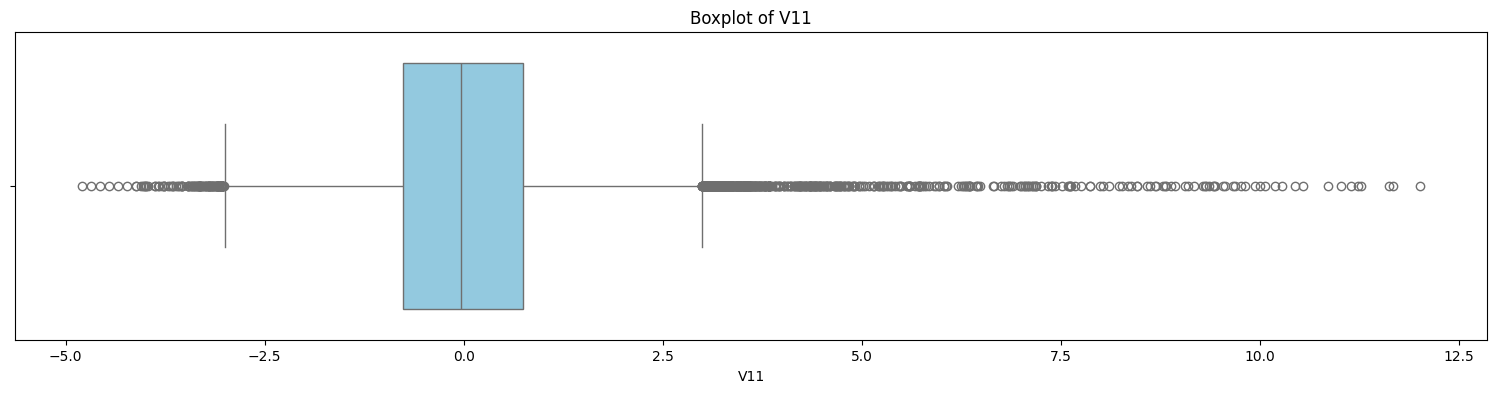

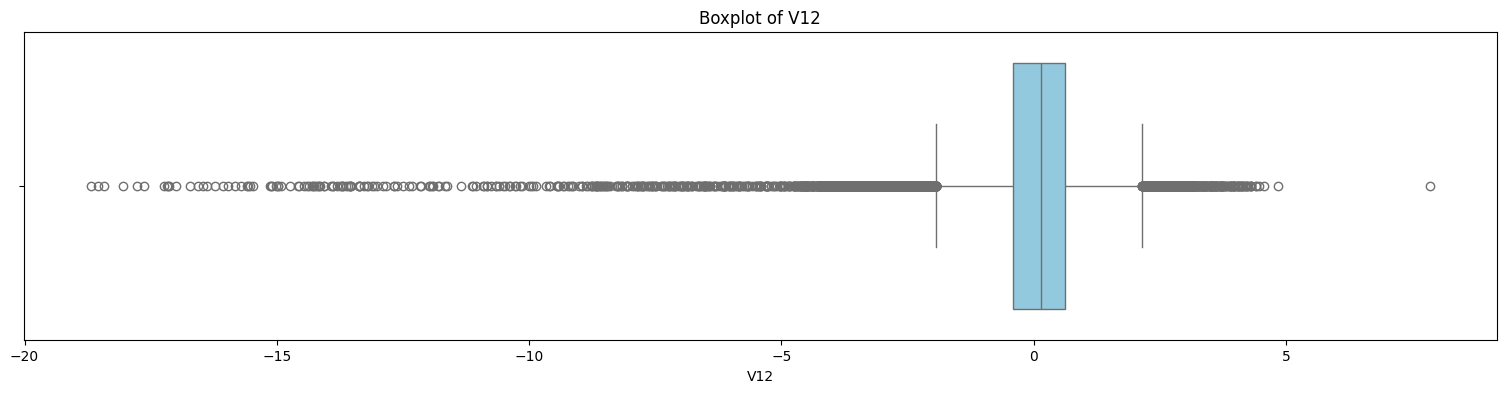

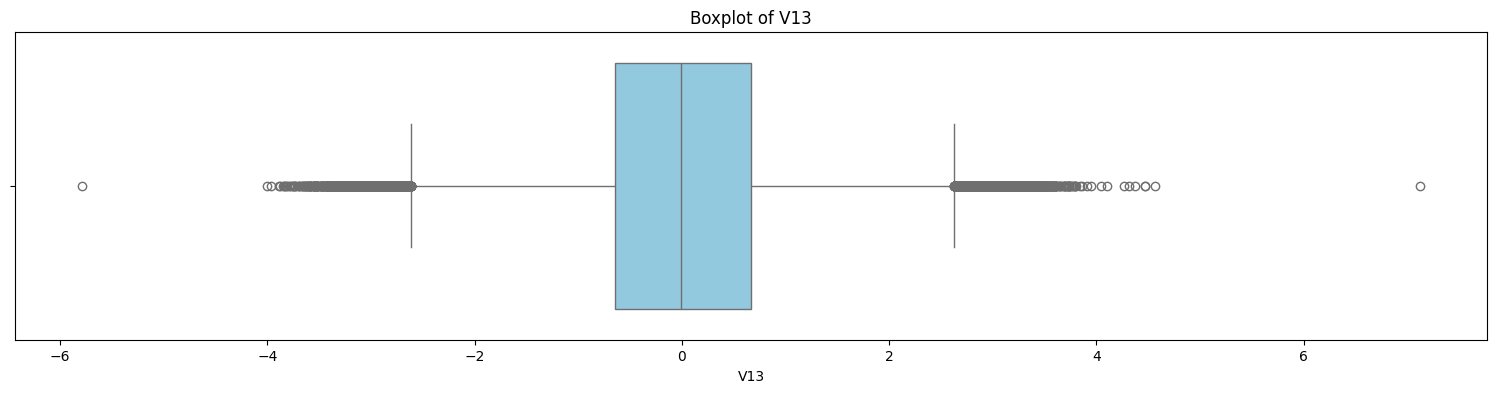

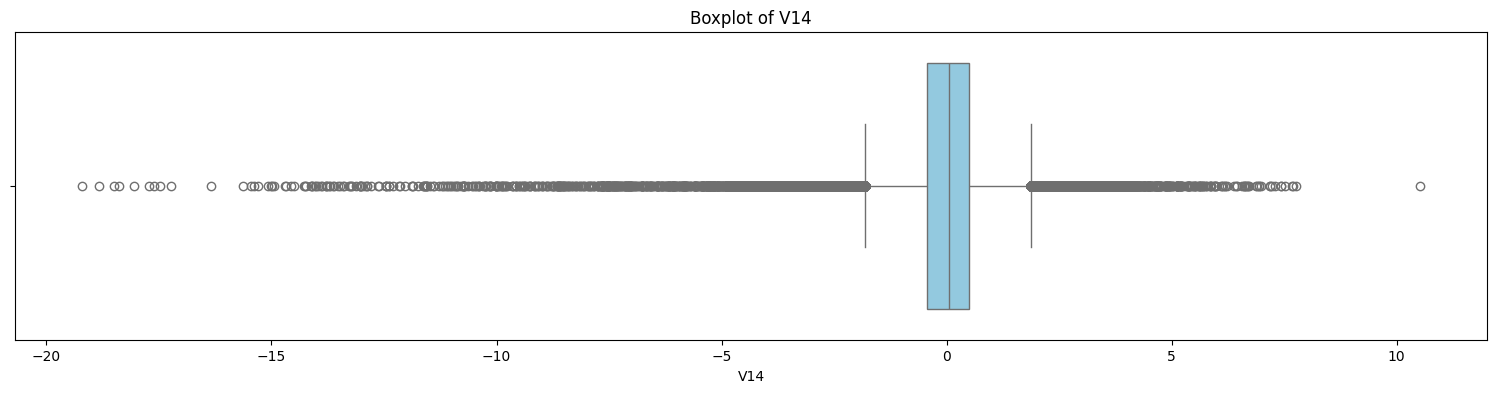

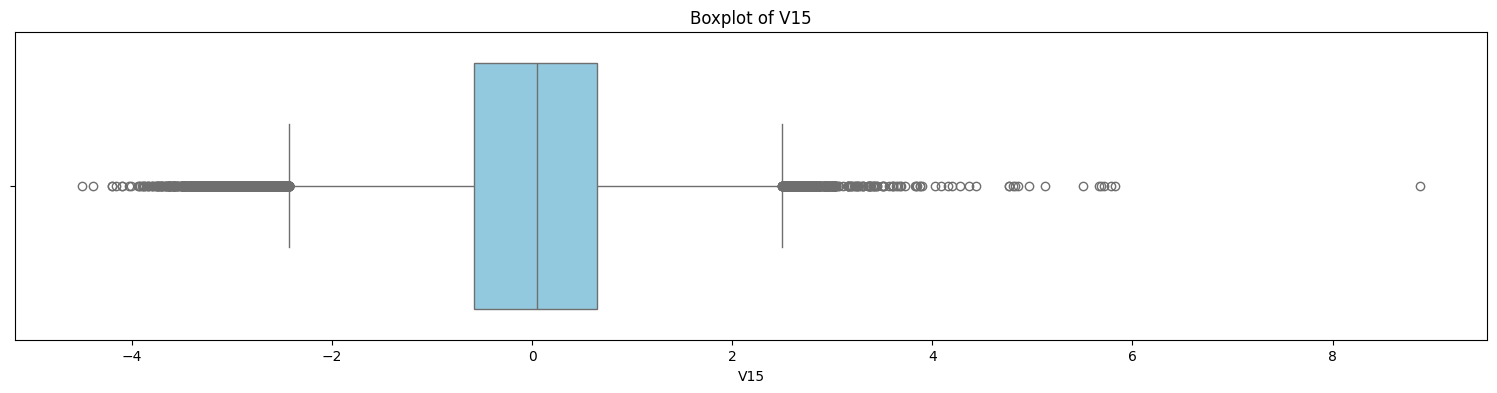

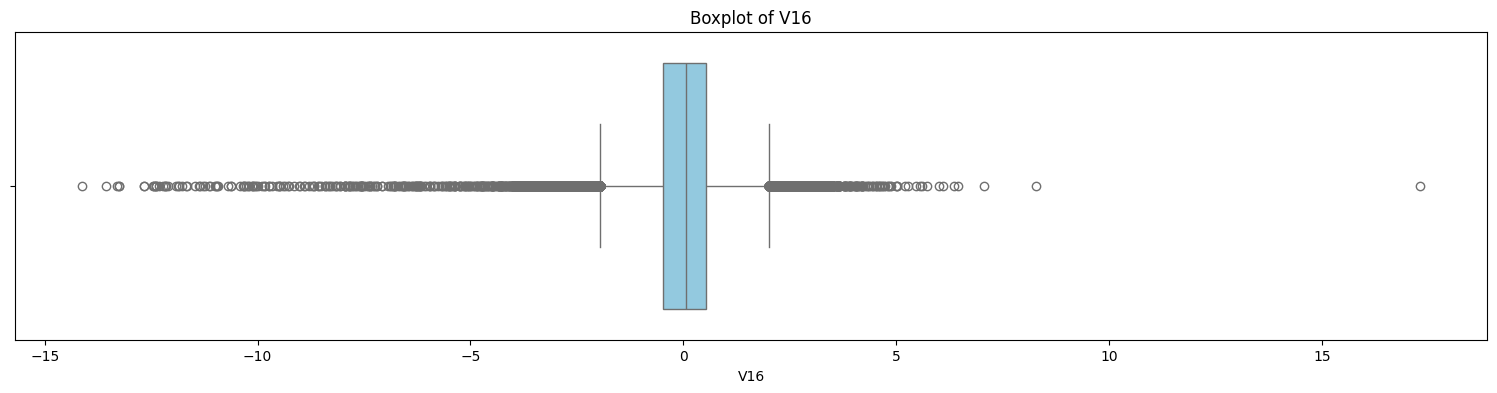

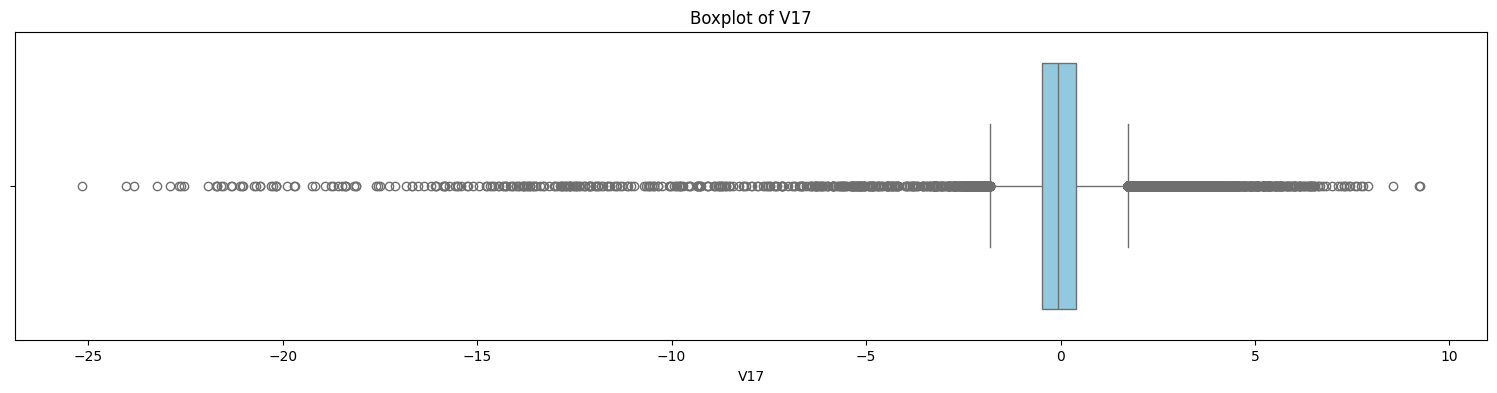

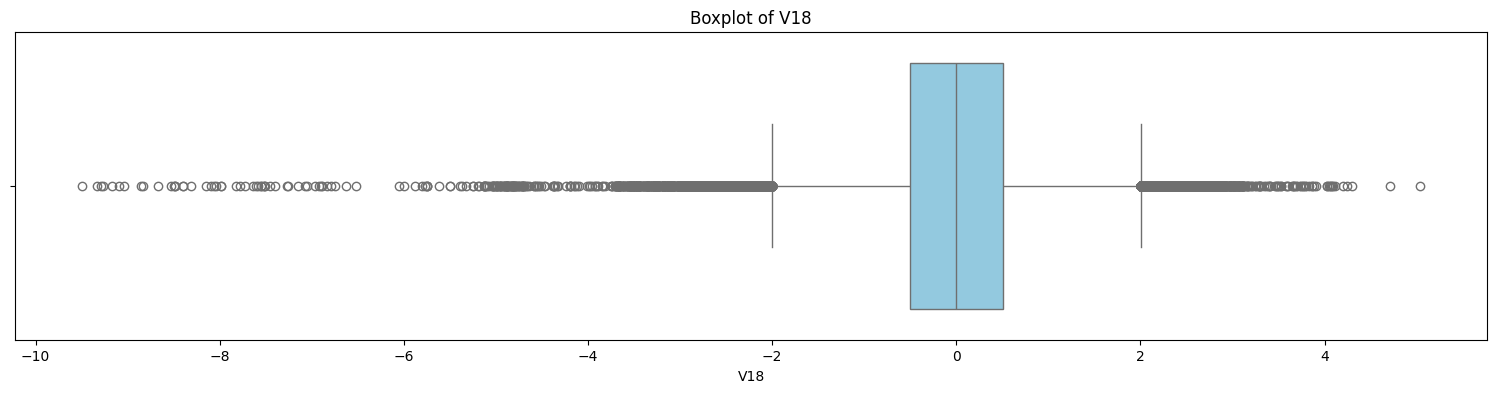

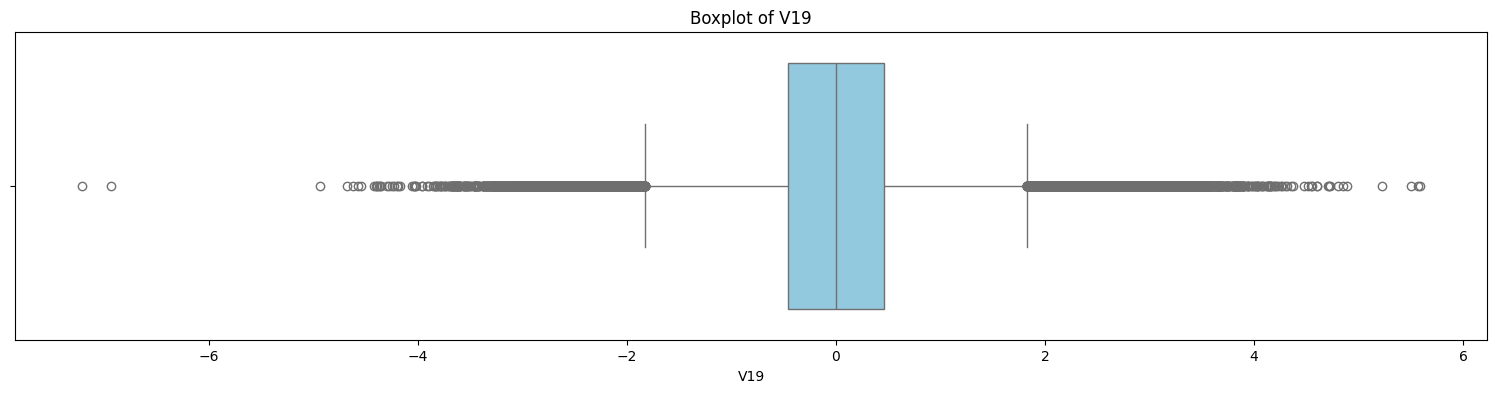

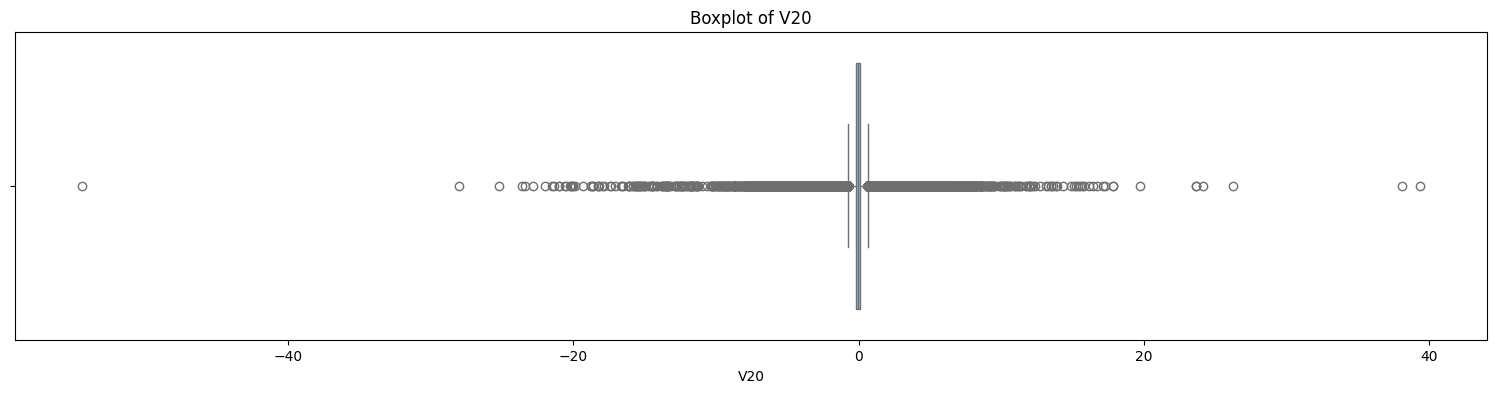

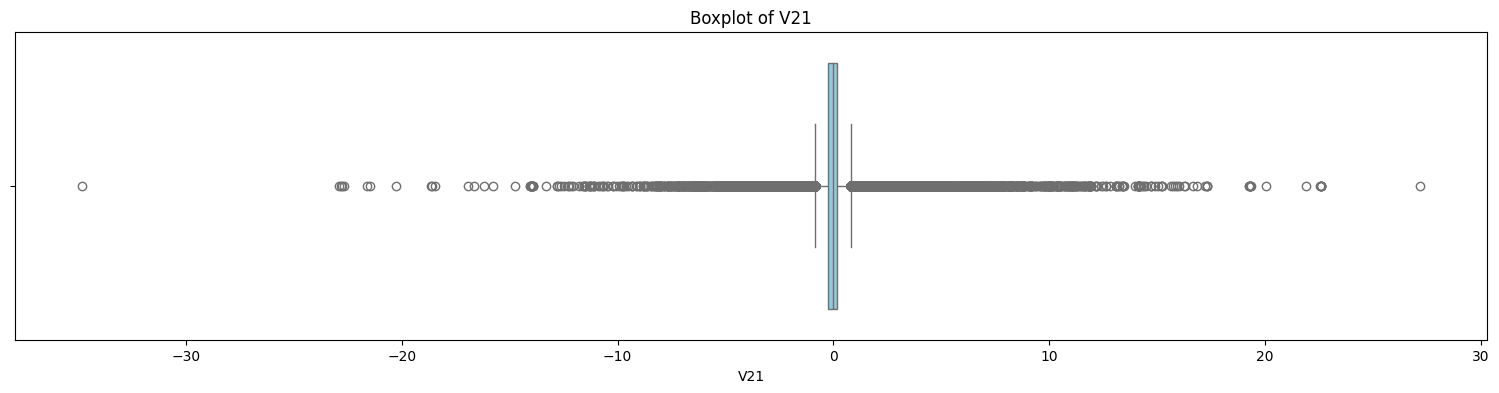

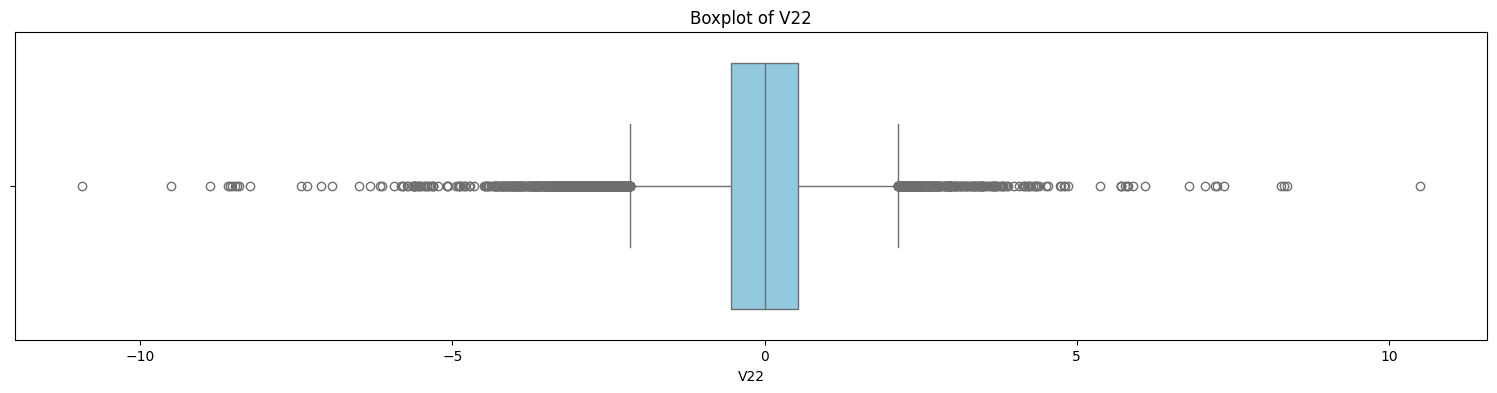

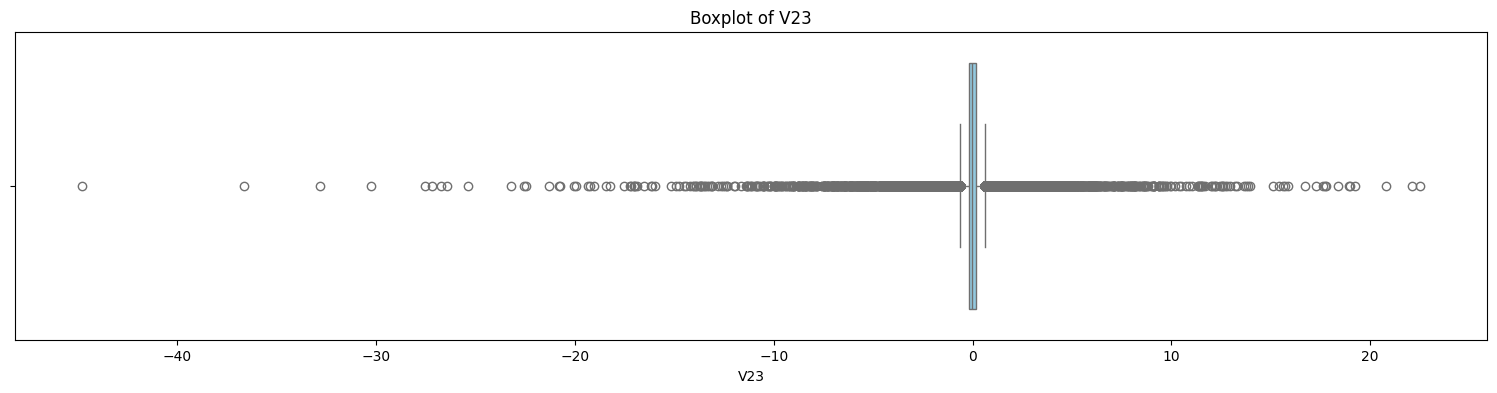

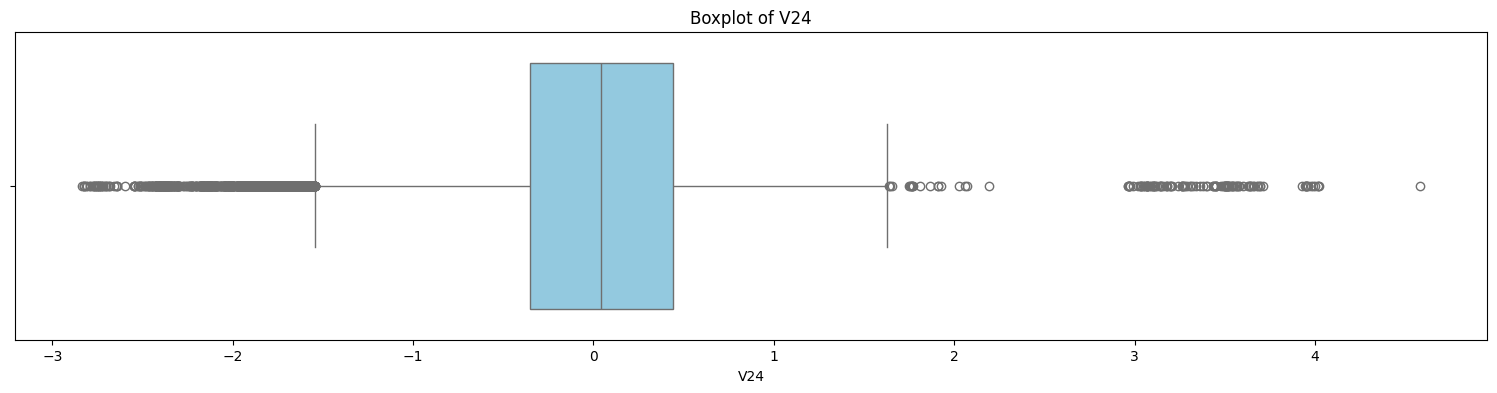

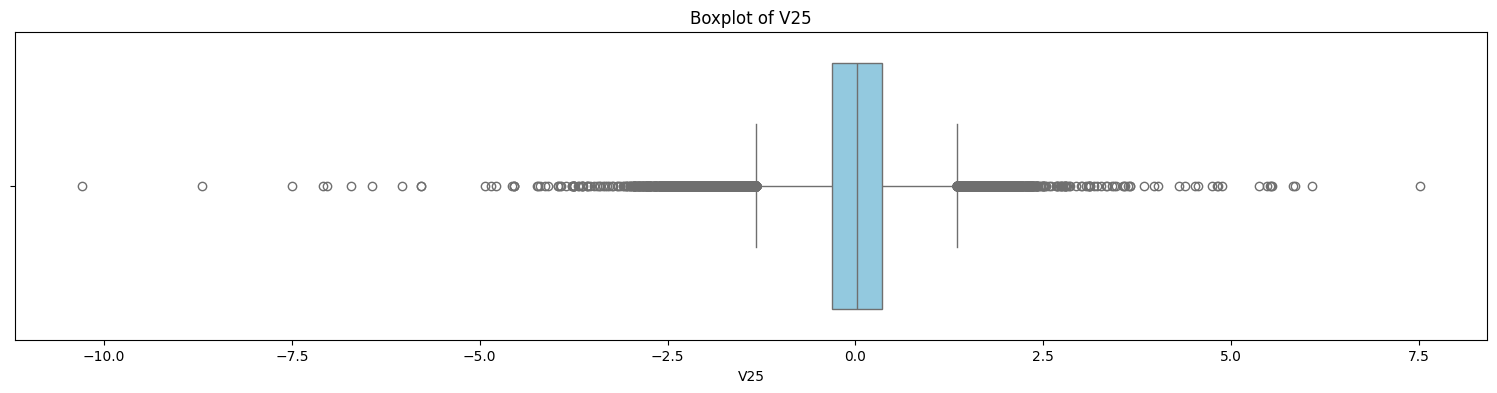

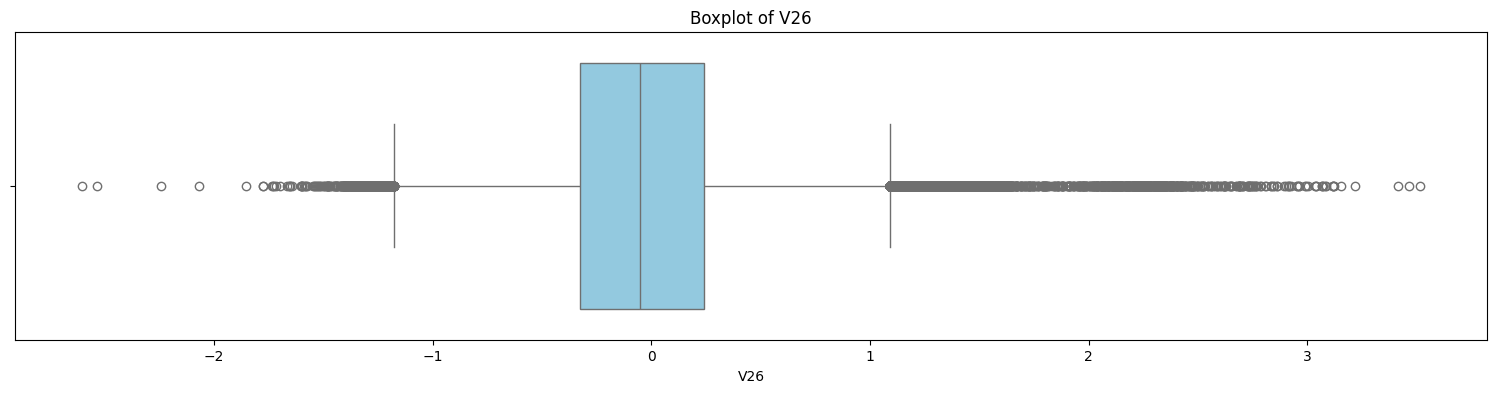

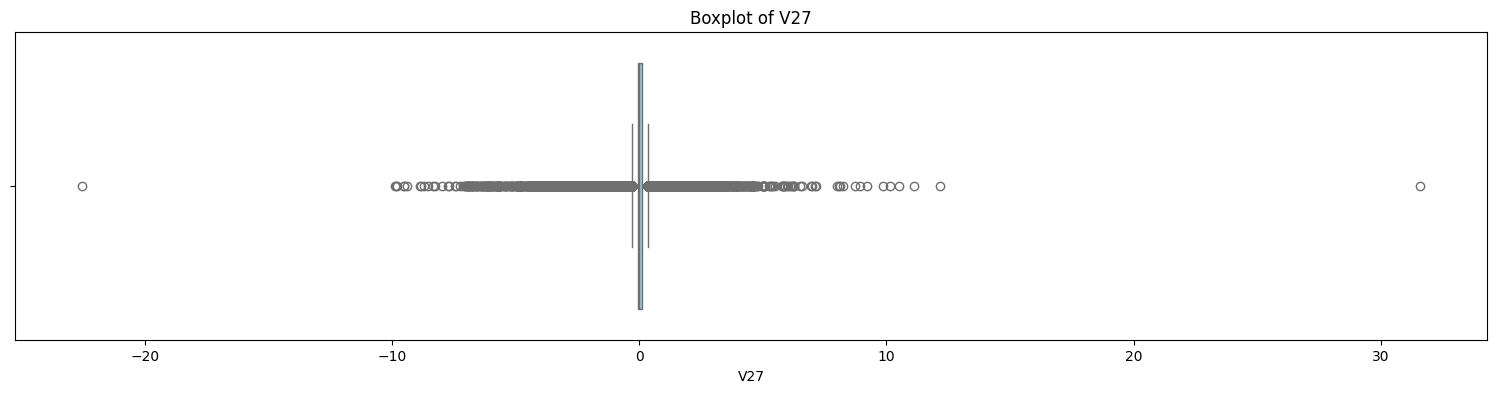

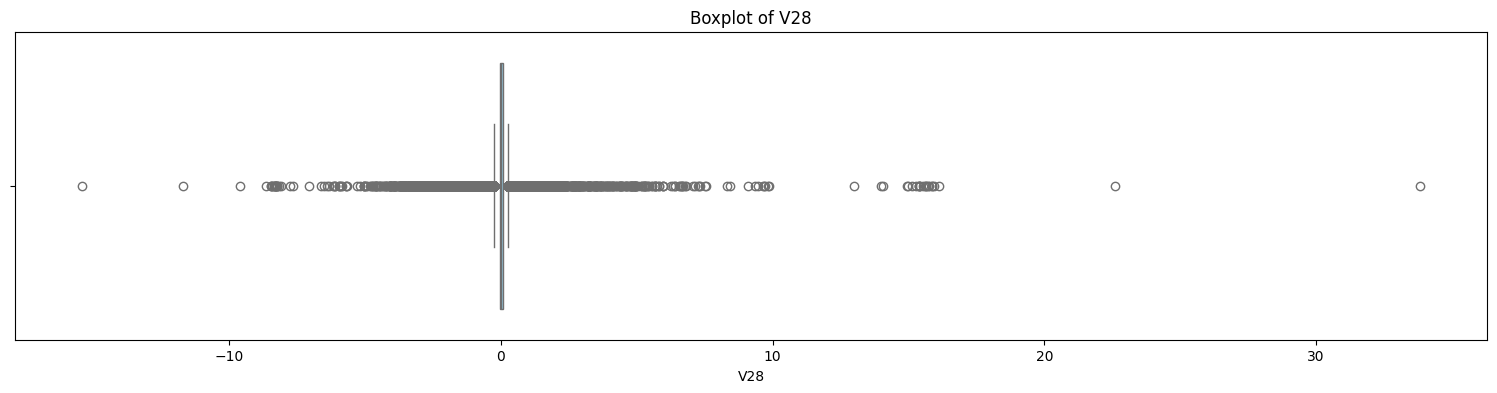

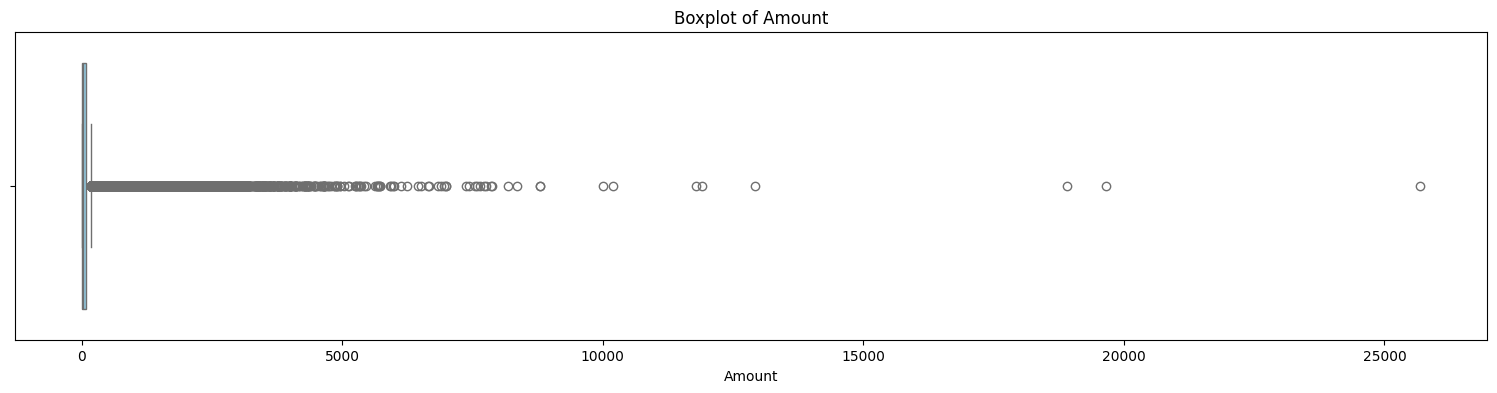

In [825]:
#create a box plot for each nummrrical columns
for feature in numerical_columns:
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [826]:
df.Class.unique()

array([0, 1])

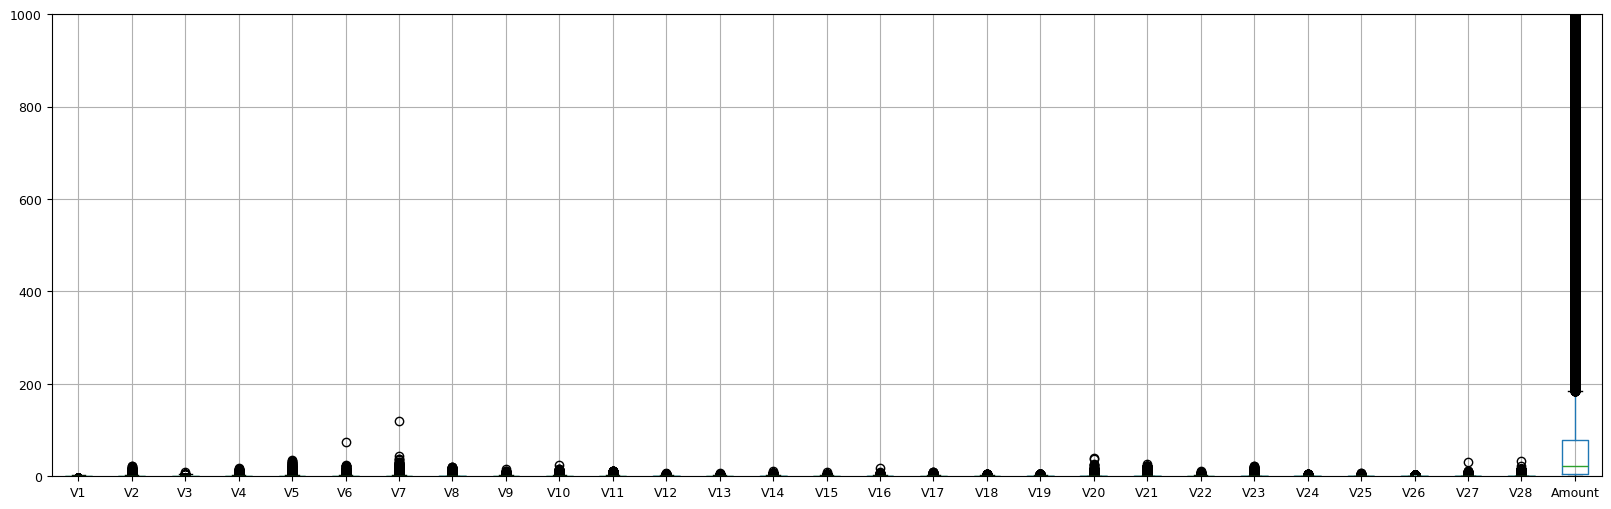

In [827]:
#create the box plot for all coulmns in one plot (the same with the previous cell)
boxplot = df.boxplot(column=numerical_columns, grid=True, fontsize=9, figsize=(20, 6))
plt.ylim(0, 1000)
plt.show()

In [828]:
df.shape

(283726, 31)

In [829]:
#calculate the median for each columns in the data
medians = []
for col in numerical_columns:
    median = df[col].median()
    medians.append(median)
medians

[0.020384054673383903,
 0.0639491720686272,
 0.1799627277579035,
 -0.0222480167048314,
 -0.05346760692155525,
 -0.2751676384634605,
 0.040859470599398345,
 0.021897947014776098,
 -0.0525956513955632,
 -0.09323652620247,
 -0.03230594037210535,
 0.13907201031481248,
 -0.012926990224900549,
 0.05020867775725035,
 0.04929885180469505,
 0.0671191378908382,
 -0.0658669329326605,
 -0.00214175617719485,
 0.0033670829391581,
 -0.062353459380288,
 -0.02944058938024295,
 0.0066748951611519,
 -0.011158576827809599,
 0.04101573318896705,
 0.01627836170044545,
 -0.0521716279959135,
 0.001478594836733,
 0.0112876044697928,
 22.0]

In [830]:
upper_bounds = []
lower_bounds = []
Q1s = []
Q3s = []
IQRs = []
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    Q1s.append(Q1)
    Q3s.append(Q3)
    IQRs.append(IQR)
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    lower_bounds.append(lower)
    upper_bounds.append(upper)
lower_bounds

[-4.263979957375013,
 -2.7012257535647324,
 -3.7646449731967664,
 -3.2348066128229642,
 -2.6429012689627394,
 -2.517765132942298,
 -2.236984407382578,
 -1.0106267049372626,
 -2.504517212462476,
 -2.019373365934702,
 -3.013492029375163,
 -1.940959067195664,
 -2.6144226683861955,
 -1.802834475317419,
 -2.428785787237029,
 -1.952416410433839,
 -1.8082765194756663,
 -1.997969244031534,
 -1.8284841911416798,
 -0.7284838654918867,
 -0.8500526757143614,
 -2.1491170627897875,
 -0.6258812915555879,
 -1.5457413287661317,
 -1.3197144770106826,
 -1.1773004551337805,
 -0.3134143028572532,
 -0.2494592299657585,
 -102.26500000000001]

In [831]:
Q3s

[1.31606775368132,
 0.8002828928387605,
 1.0269599742860676,
 0.739646964483283,
 0.6122179627567953,
 0.39679214047379624,
 0.5704738684867068,
 0.3257036839267247,
 0.5959768591827228,
 0.4536187284492523,
 0.7395791921050707,
 0.6169764893919558,
 0.6631783137505225,
 0.492335540901136,
 0.6501041163940502,
 0.5235115807729338,
 0.3989717123472575,
 0.5019556651381313,
 0.4585079337186285,
 0.133207117892697,
 0.18619360292644677,
 0.5282451977216824,
 0.147748443326184,
 0.43973848484478795,
 0.3506673662397138,
 0.2402613022919345,
 0.09120816464559875,
 0.0782760938807502,
 77.51]

In [832]:
IQRs

[2.232019084422533,
 1.4006034585613971,
 1.9166419789931337,
 1.589781430922499,
 1.3020476926878137,
 1.1658229093664376,
 1.122983310347714,
 0.534532155545595,
 1.2401976286580796,
 0.9891968377535818,
 1.5012284885920937,
 1.023174222635048,
 1.3110403928546872,
 0.918068006487422,
 1.2315559614524316,
 0.9903711964827091,
 0.8828992927291694,
 0.9999699636678661,
 0.9147968499441232,
 0.3446763933538335,
 0.41449851145632327,
 1.070944904204588,
 0.3094518939527088,
 0.7941919254443679,
 0.6681527373001586,
 0.567024702970286,
 0.16184898700114078,
 0.13109412953860347,
 71.91000000000001]

In [833]:
upper_bounds

[4.66409638031512,
 2.901188080680856,
 3.901922942775768,
 3.1243191108670314,
 2.565289501788516,
 2.1455265045234526,
 2.2549488340082777,
 1.127501917245117,
 2.4562733021698424,
 1.937413985079625,
 2.991421924993211,
 2.1517378233445275,
 2.6297389030325533,
 1.8694375506322691,
 2.4974380585726976,
 2.0090683754969976,
 1.7233206514410115,
 2.0019106106399303,
 1.8307032086348136,
 0.6502217079234472,
 0.8079413701109317,
 2.1346625540285644,
 0.6119262842552472,
 1.63102637301134,
 1.3528964721899515,
 1.0907983567473634,
 0.3339816451473099,
 0.2749172881886554,
 185.375]

In [886]:
#make a new data without "time","class" columns
new_df = df.drop(columns=['Time', 'Class'])

In [836]:
new_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [837]:
new_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [838]:
type(lower_bounds)

list

In [839]:
#in each columns make the values which grater than or smaller than lowwer,upper be the median of col
for i in range(len(numerical_columns)):
    col = numerical_columns[i]
    low_value = lower_bounds[i]
    upper_value = upper_bounds[i]
    median_value = medians[i]
    new_df.loc[(new_df[col] < low_value), col] = median_value
    new_df.loc[(new_df[col] > upper_value), col] = median_value

In [840]:
#add the column time in the begaing of the data again
new_df.insert(0, 'Time', df['Time'])

In [841]:
new_df.Time.min()

0.0

In [842]:
new_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [843]:
#add the column class to the data
new_df.insert(30, 'Class', df['Class'])

In [844]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,-0.011159,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,22.00,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,0.020384,0.063949,0.179963,-2.066656,-0.053468,-0.275168,0.040859,0.021898,1.914428,...,0.213454,0.111864,-0.011159,-0.509348,0.016278,0.250034,0.001479,0.011288,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,-0.053468,-0.275168,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [845]:
new_df['Class'].unique()

array([0, 1])

In [846]:
new_df.Time.min()

0.0

In [847]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.184819,0.079096,0.073280,-0.103417,-0.044245,-0.258654,0.015618,0.066312,-0.047041,...,-0.020257,0.005758,-0.009578,0.027416,0.012920,-0.020961,0.011448,0.017237,33.648355,0.001667
std,47481.047891,1.433833,0.940959,1.305623,1.147599,0.931076,0.754459,0.767579,0.371627,0.926394,...,0.264399,0.692160,0.215143,0.558766,0.457836,0.440299,0.113543,0.089897,40.130954,0.040796
min,0.000000,-4.263957,-2.701076,-3.764603,-3.234792,-2.642497,-2.515798,-2.236876,-1.010584,-2.504447,...,-0.850004,-2.148888,-0.625744,-1.545484,-1.319663,-1.177067,-0.313398,-0.249433,0.000000,0.000000
25%,54204.750000,-0.828501,-0.501462,-0.821619,-0.823754,-0.648460,-0.756042,-0.510543,-0.165200,-0.618982,...,-0.209868,-0.536155,-0.140810,-0.326643,-0.300966,-0.324353,-0.047431,-0.036656,5.600000,0.000000
50%,84692.500000,0.020385,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.743739,1.026684,0.625521,0.516326,0.148495,0.536240,0.255307,0.531172,...,0.158272,0.524965,0.119326,0.438905,0.342994,0.209873,0.054930,0.057484,44.800000,0.000000
max,172792.000000,2.454930,2.901063,3.894346,3.124302,2.565049,2.145273,2.254421,1.127458,2.455928,...,0.807907,2.133863,0.611675,1.625118,1.352876,1.090784,0.333961,0.274894,185.370000,1.000000


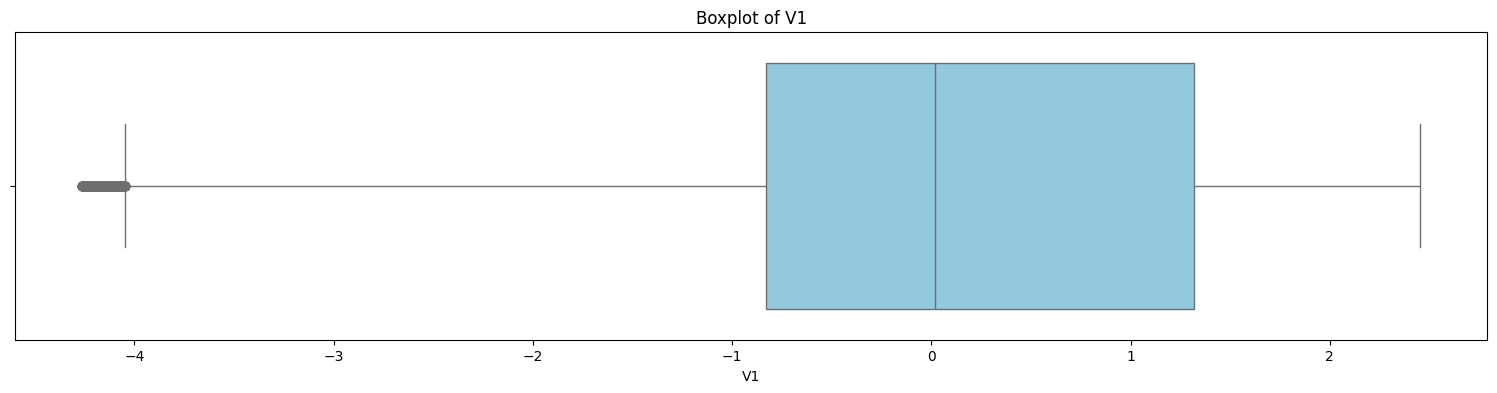

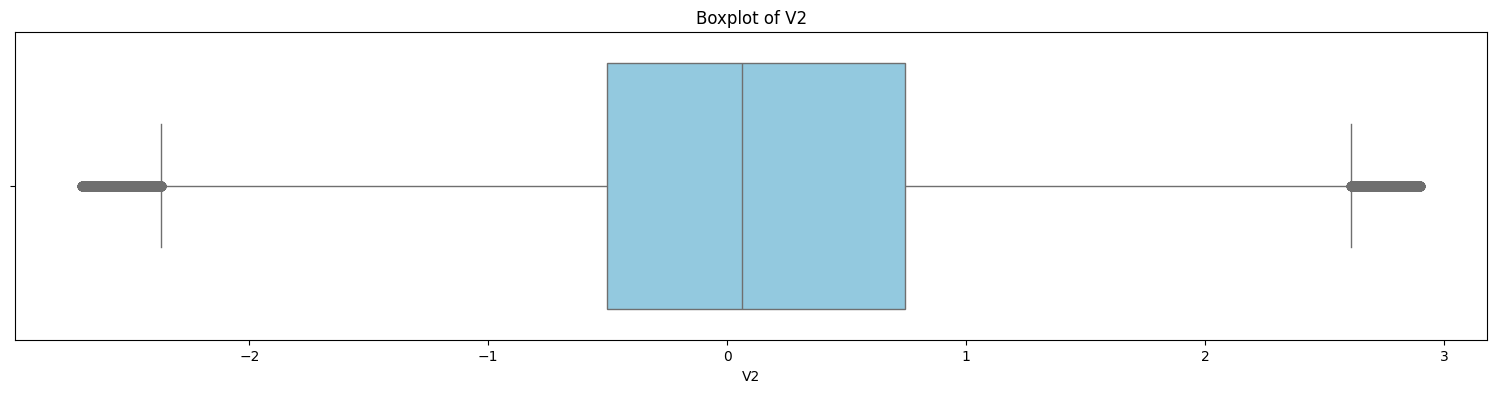

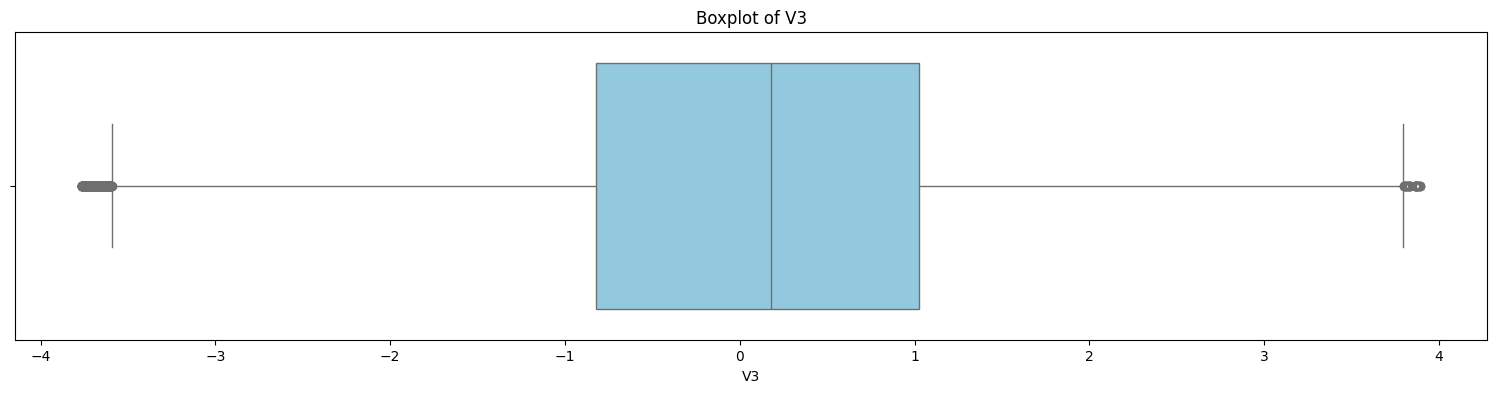

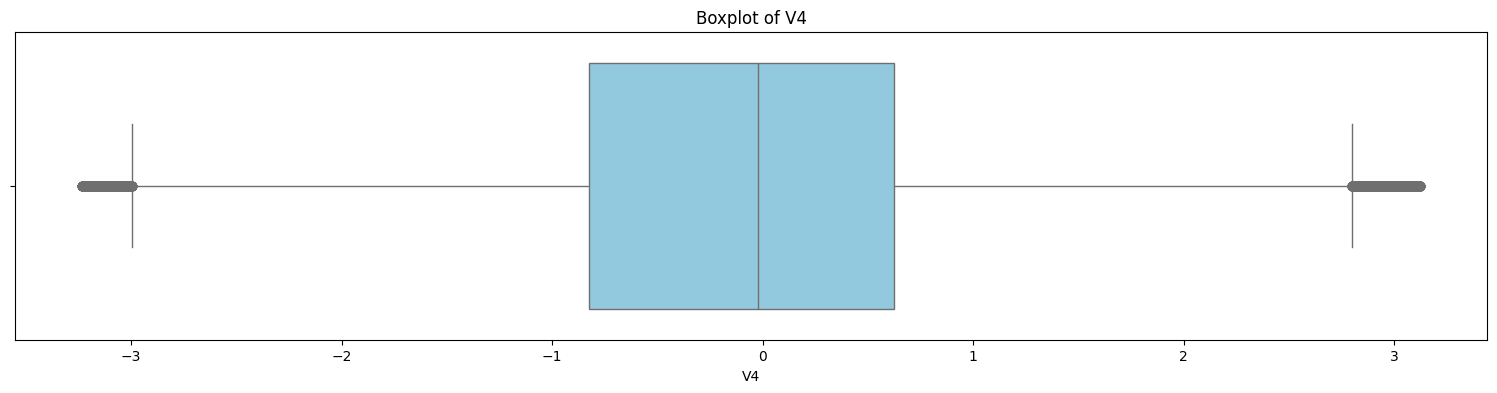

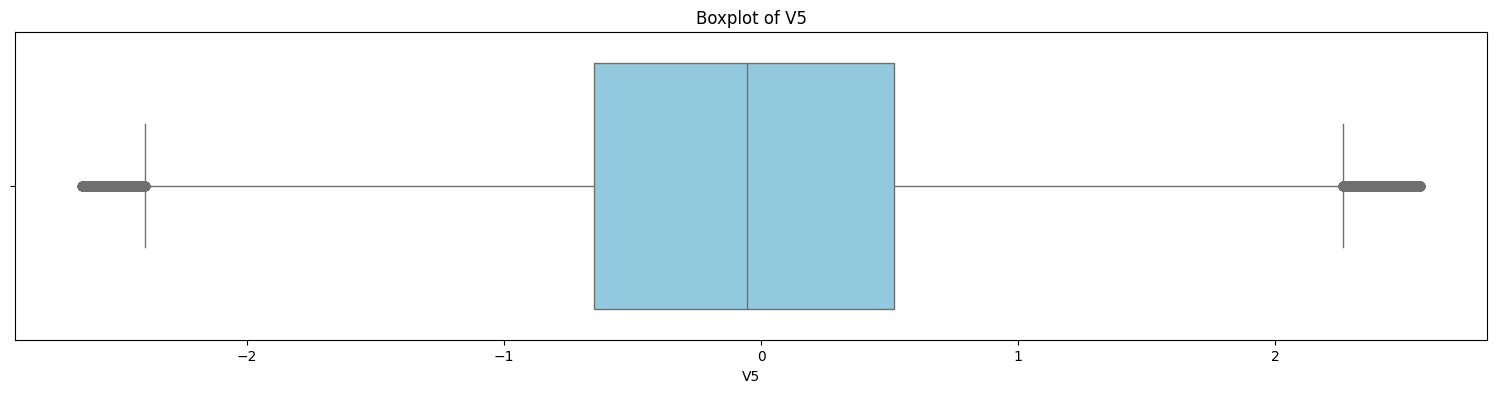

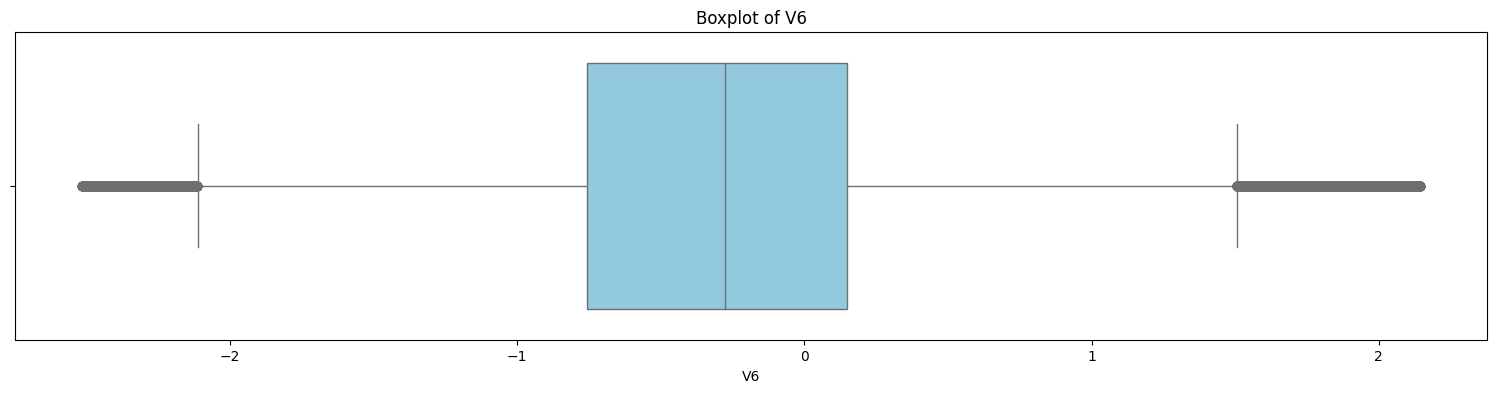

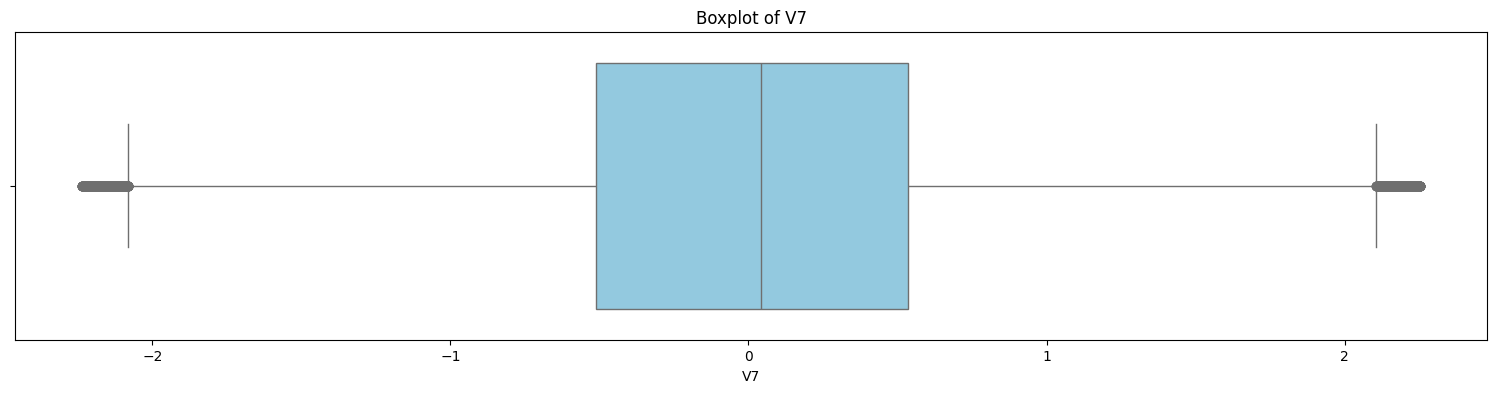

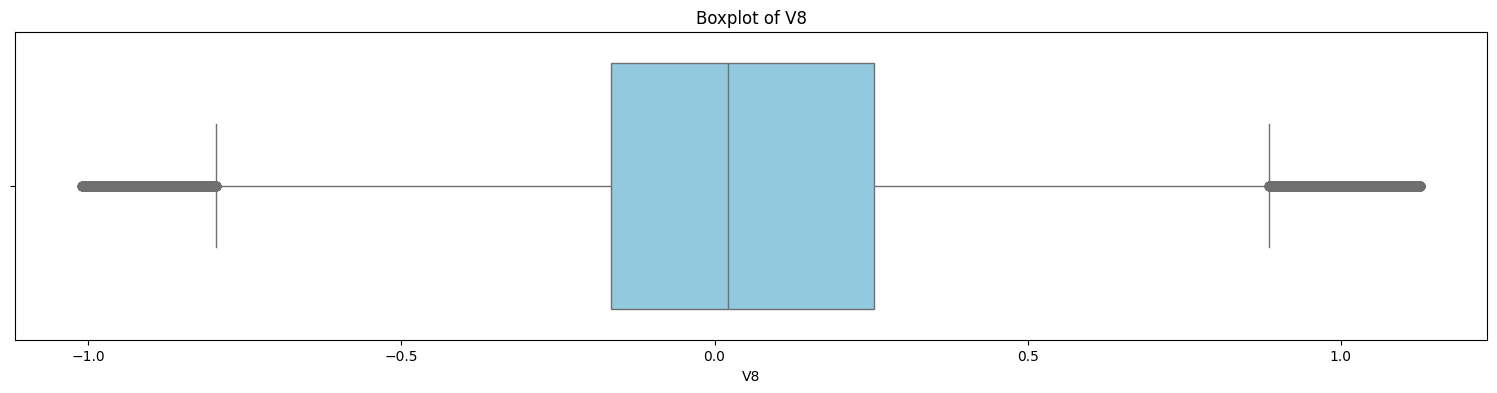

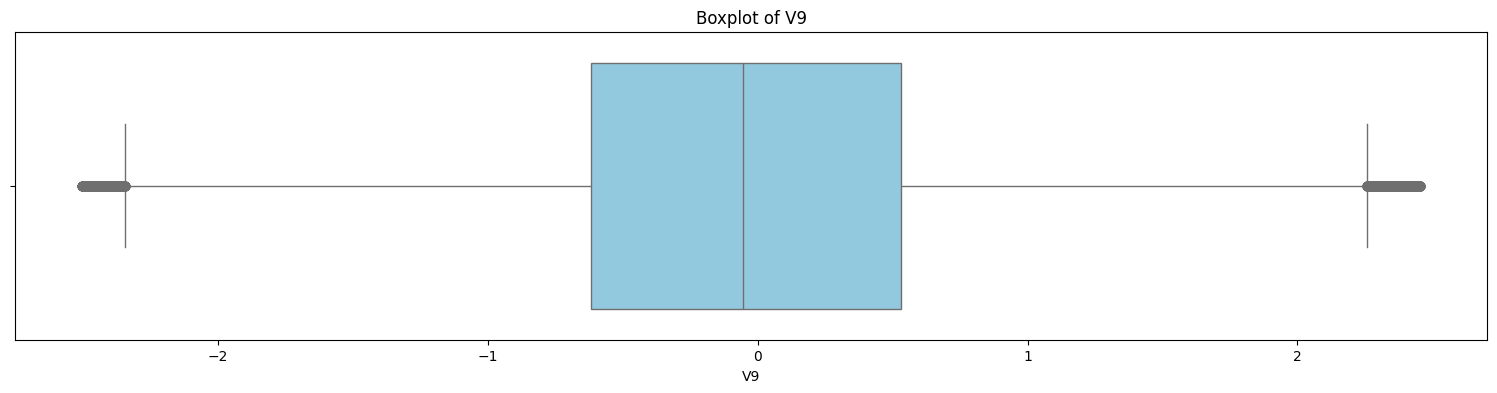

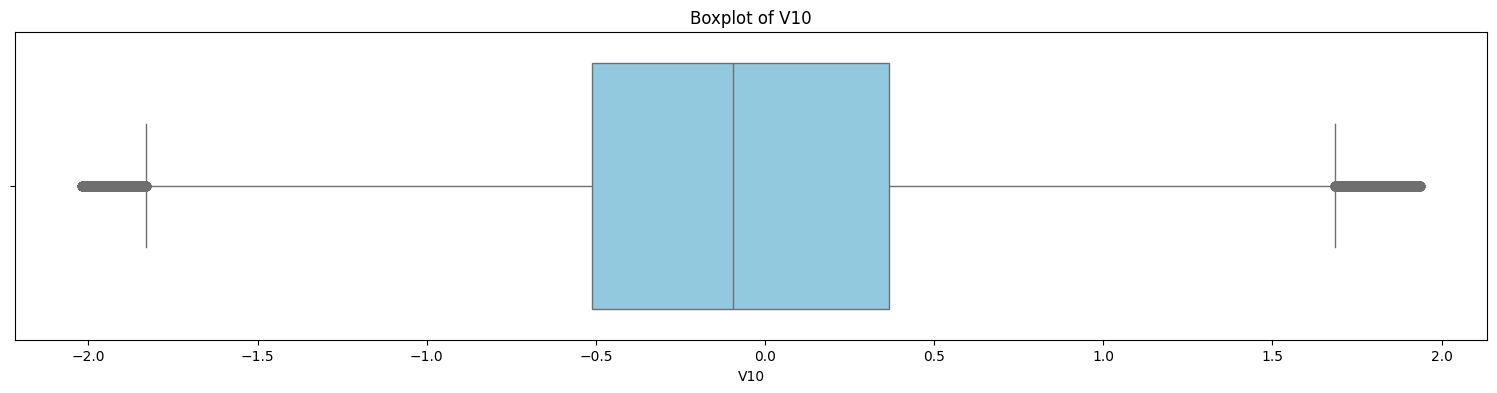

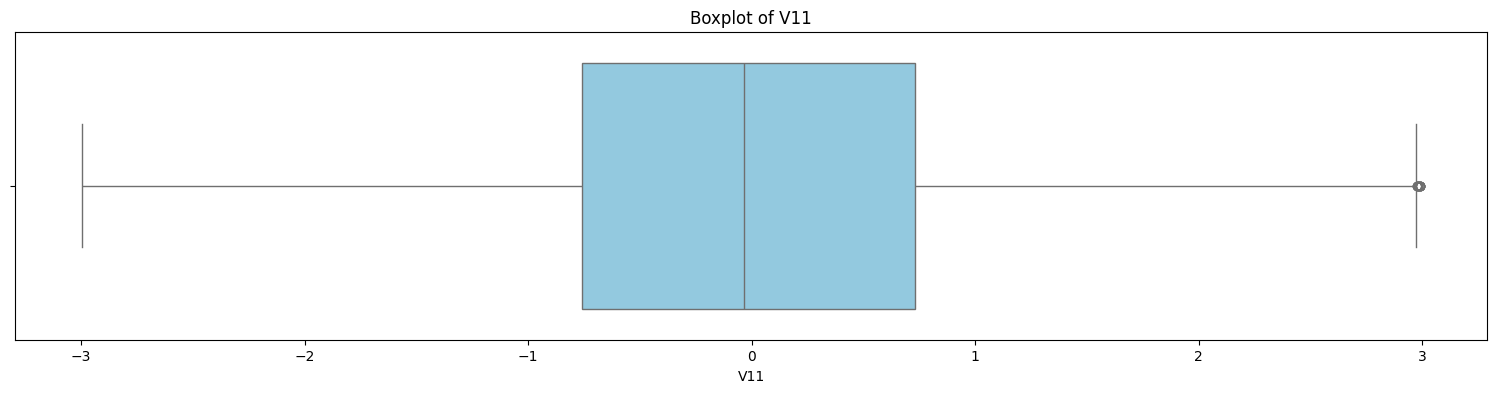

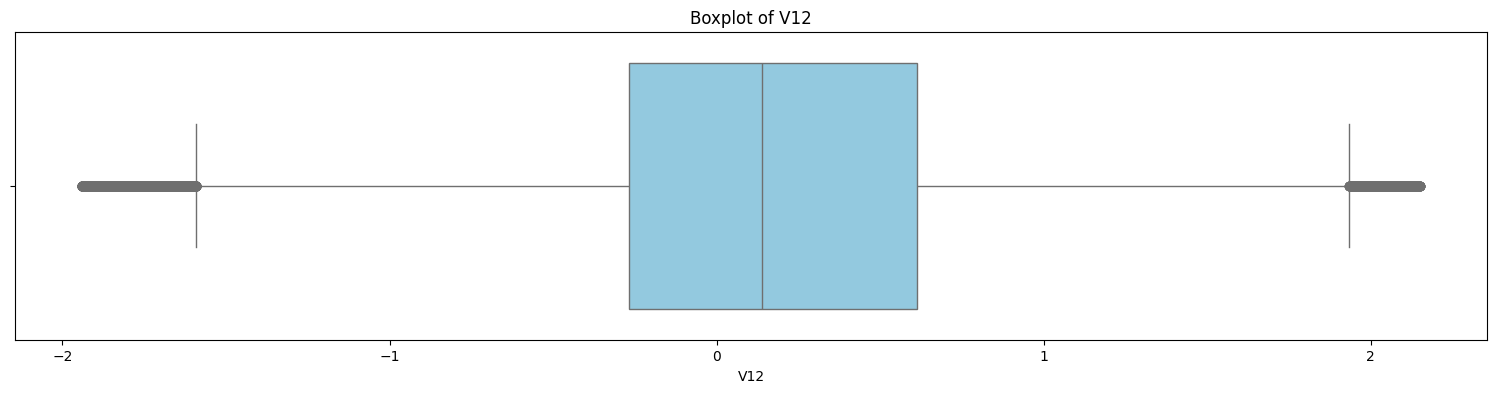

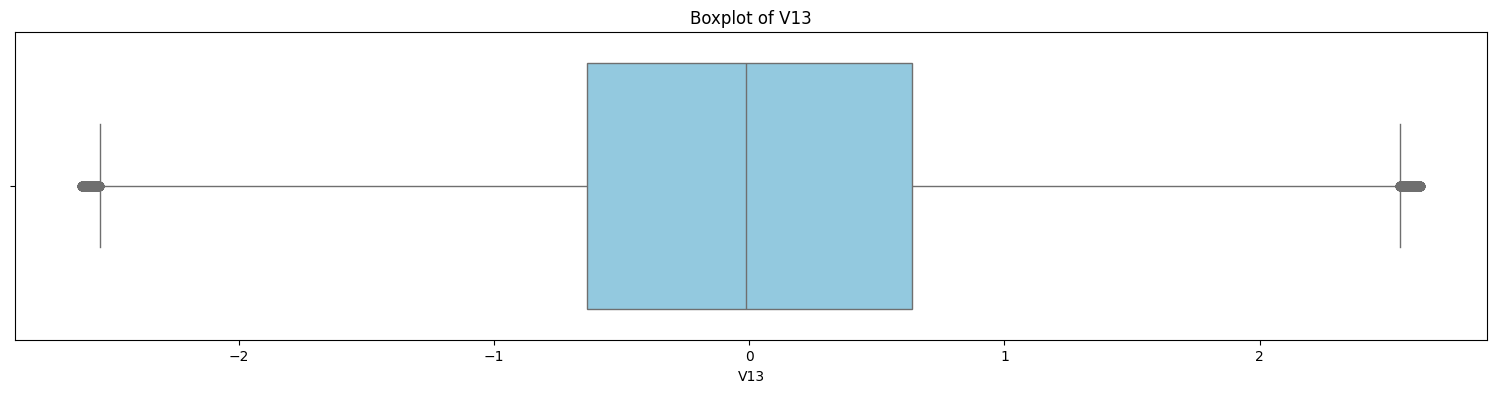

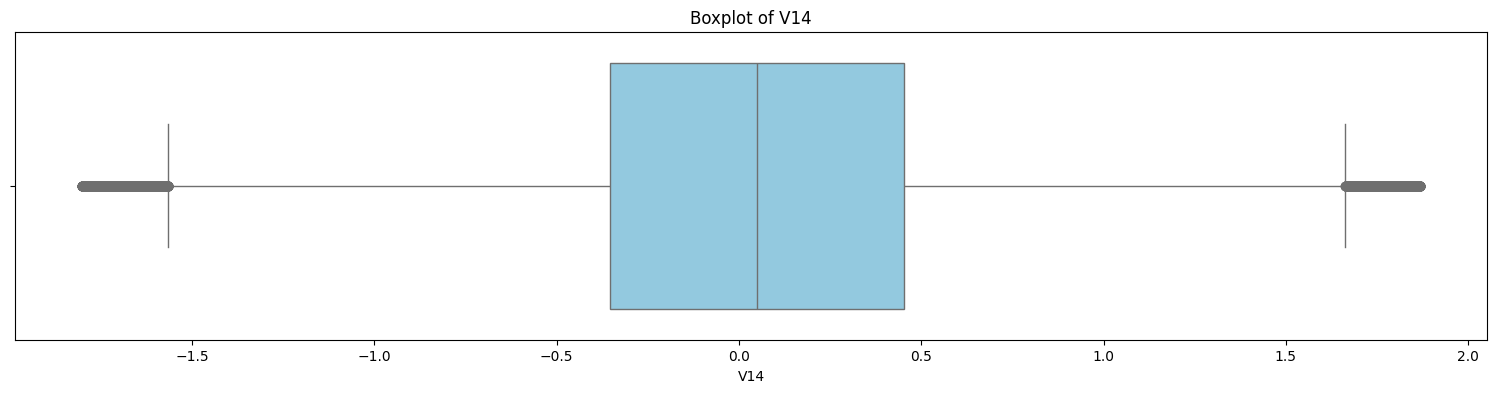

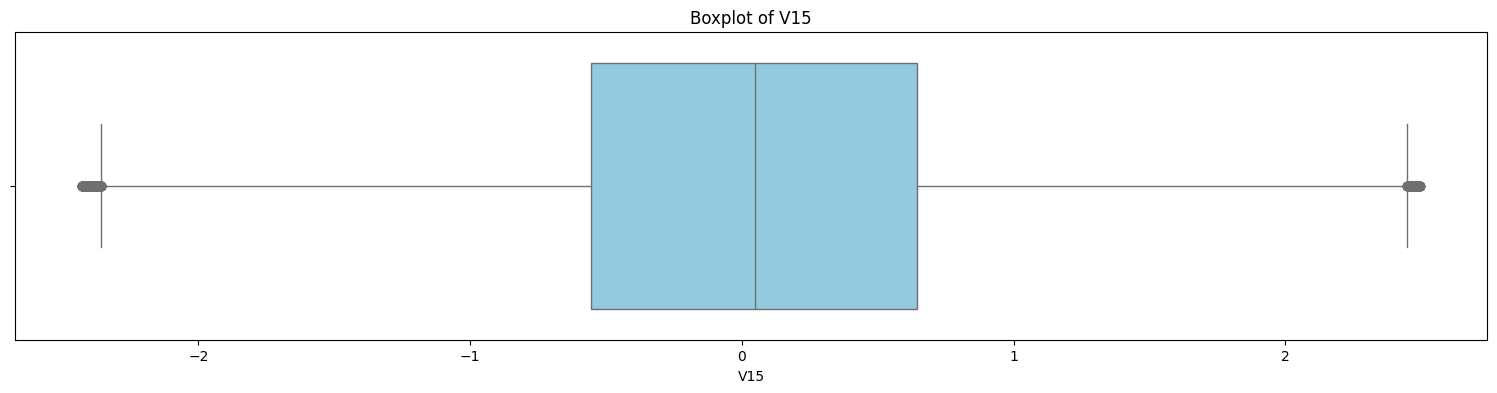

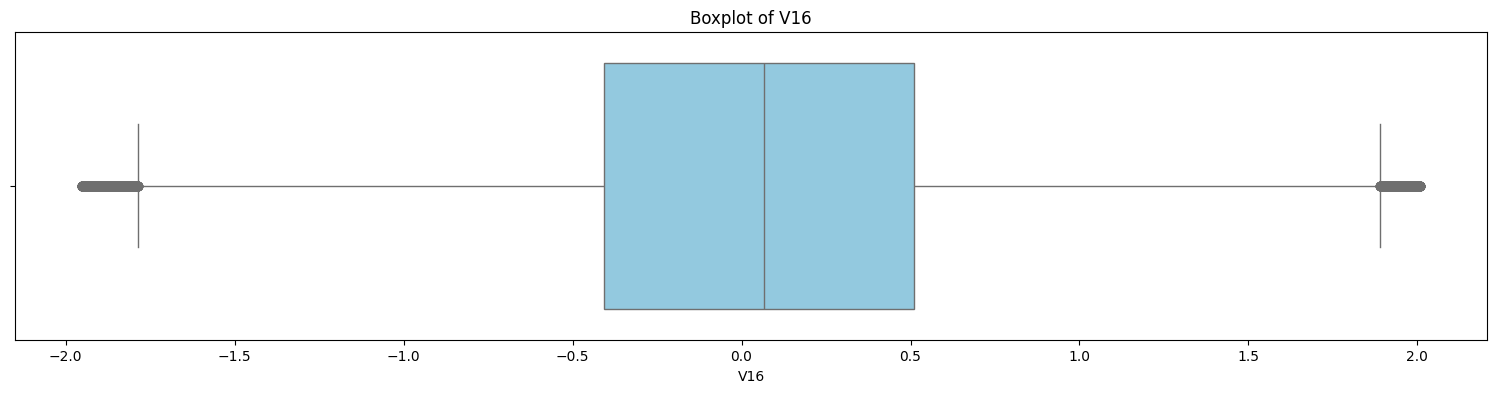

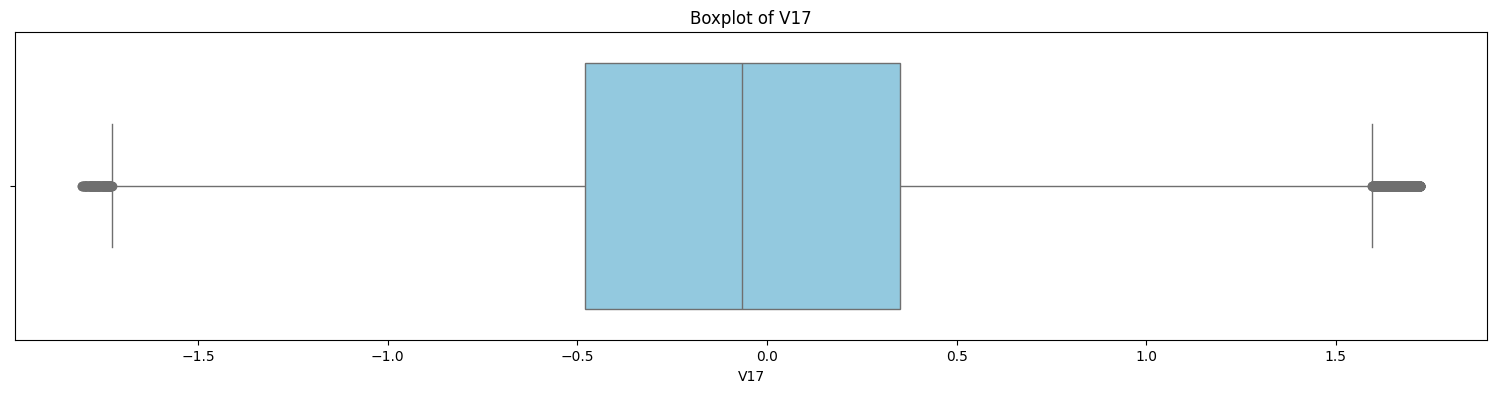

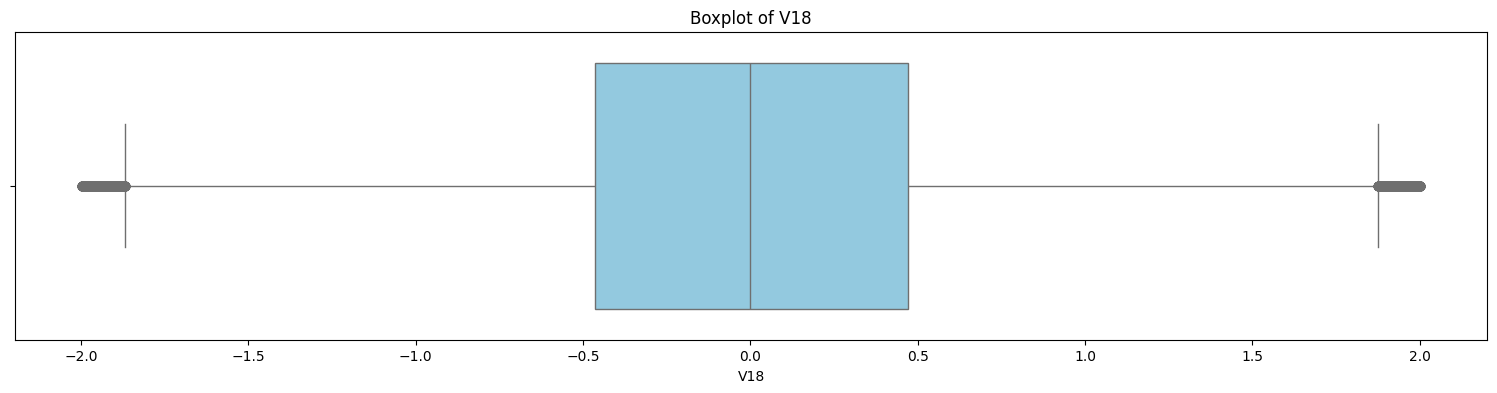

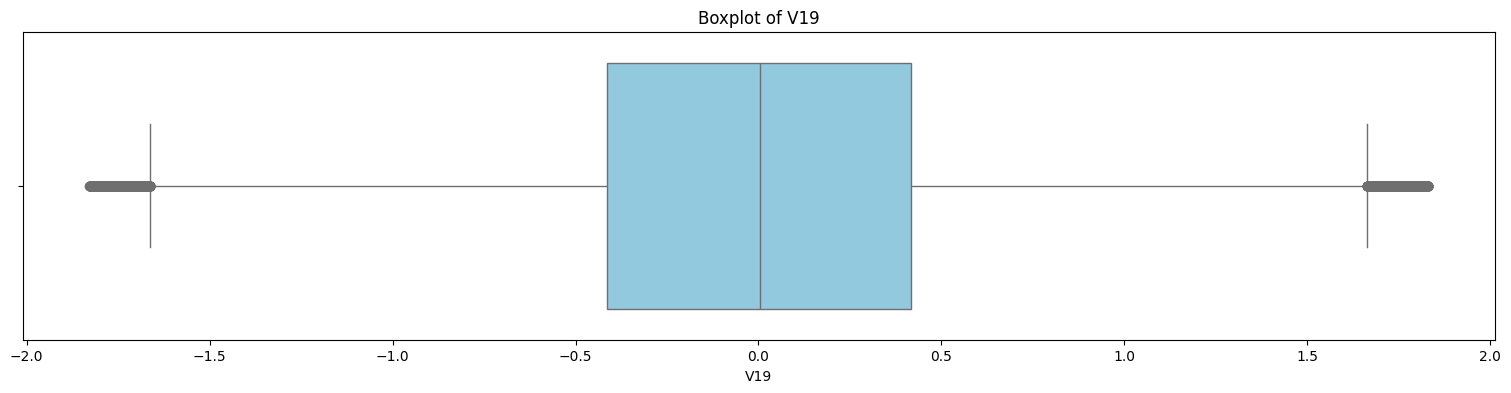

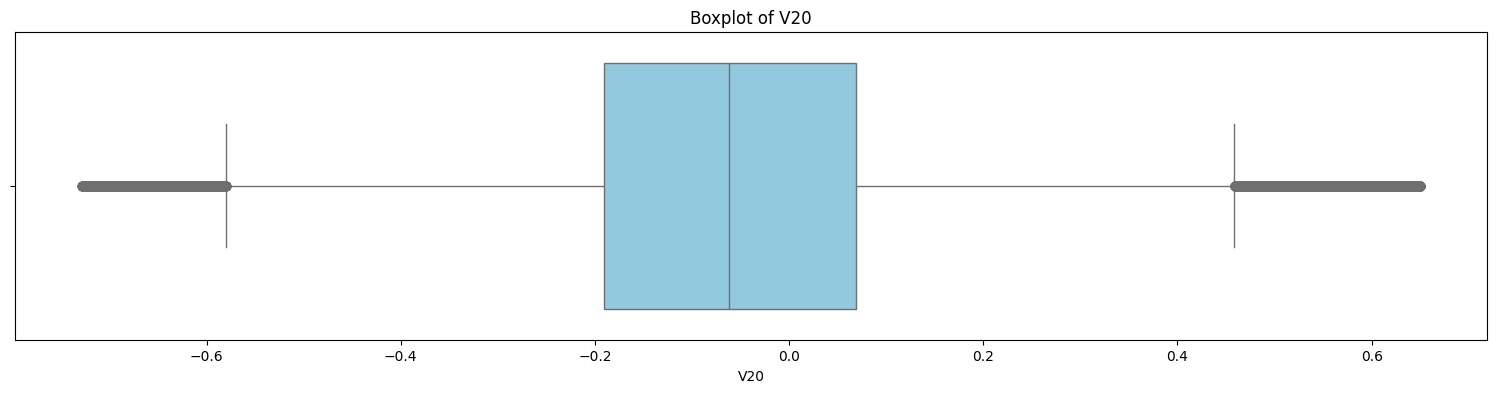

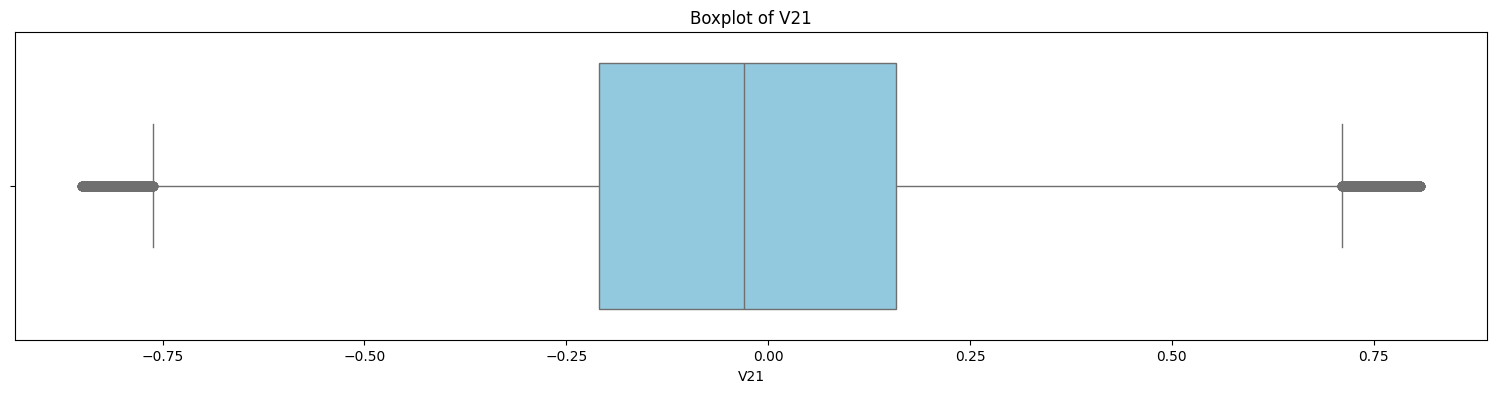

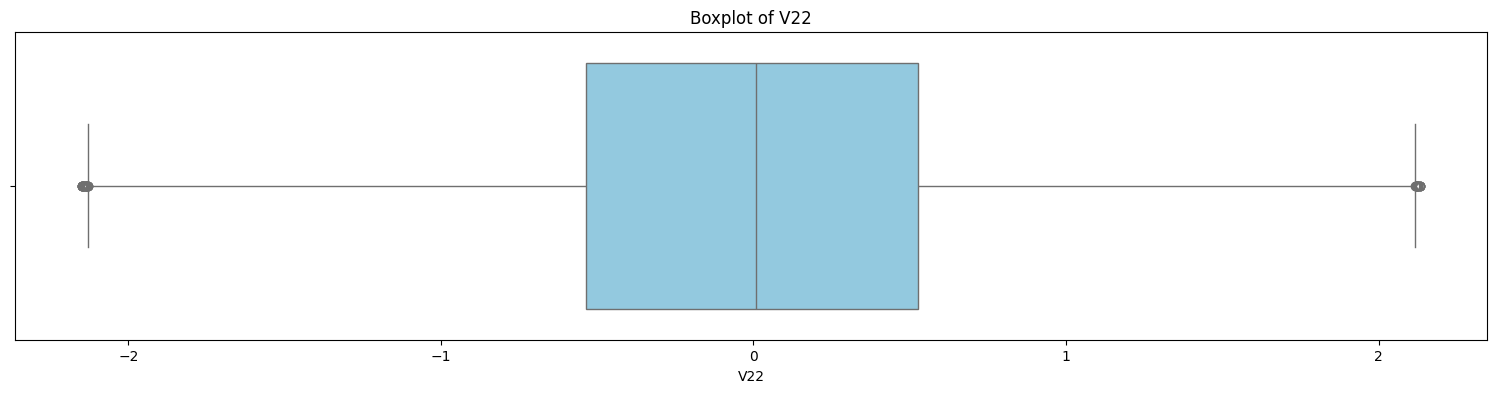

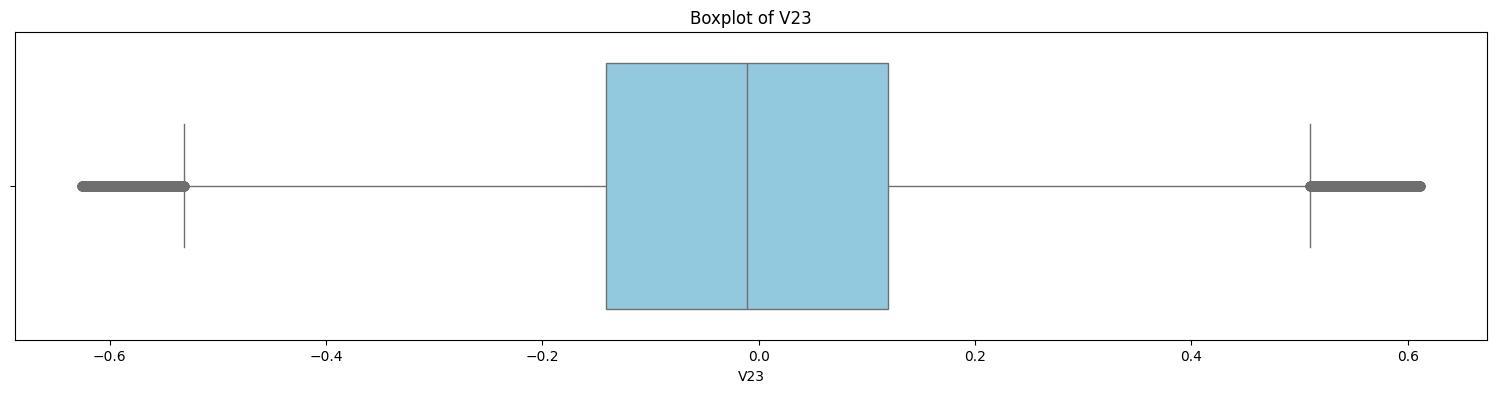

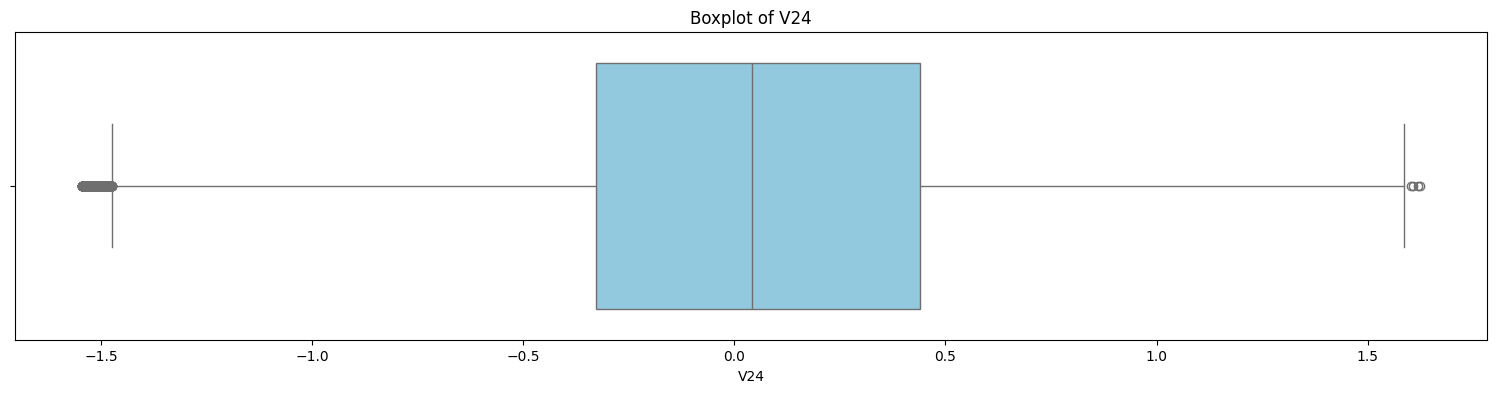

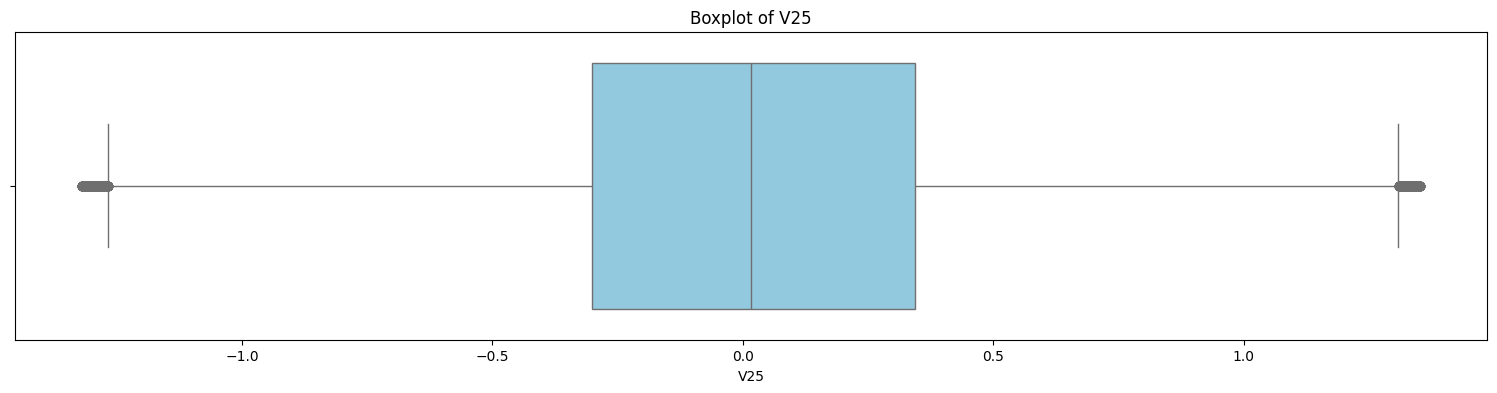

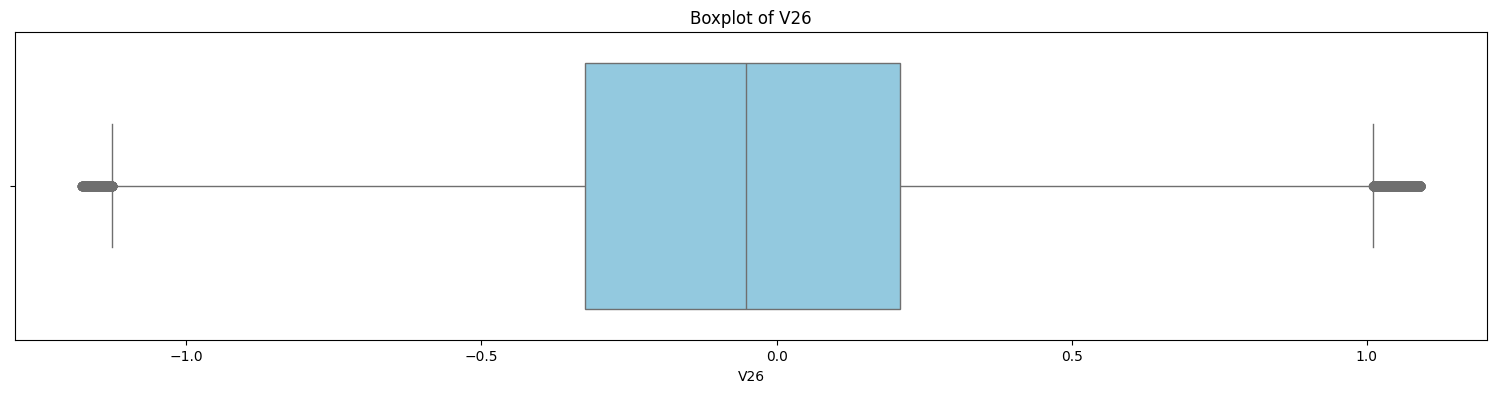

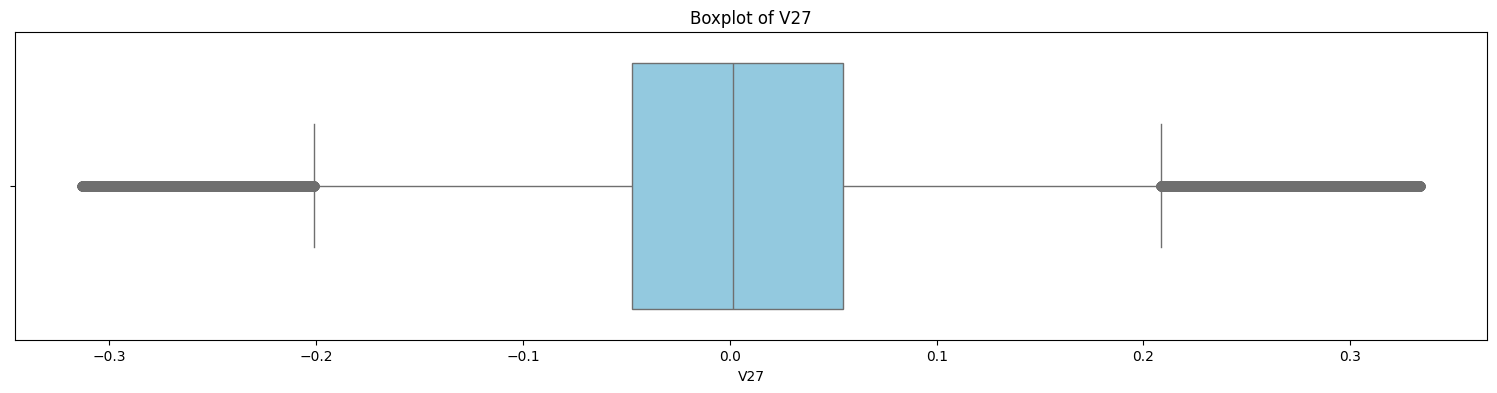

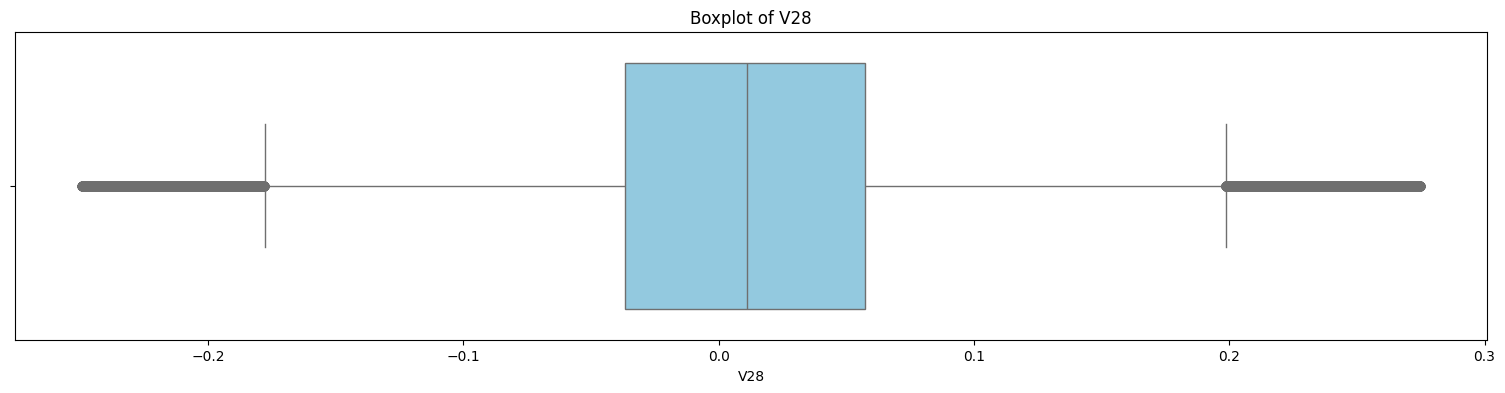

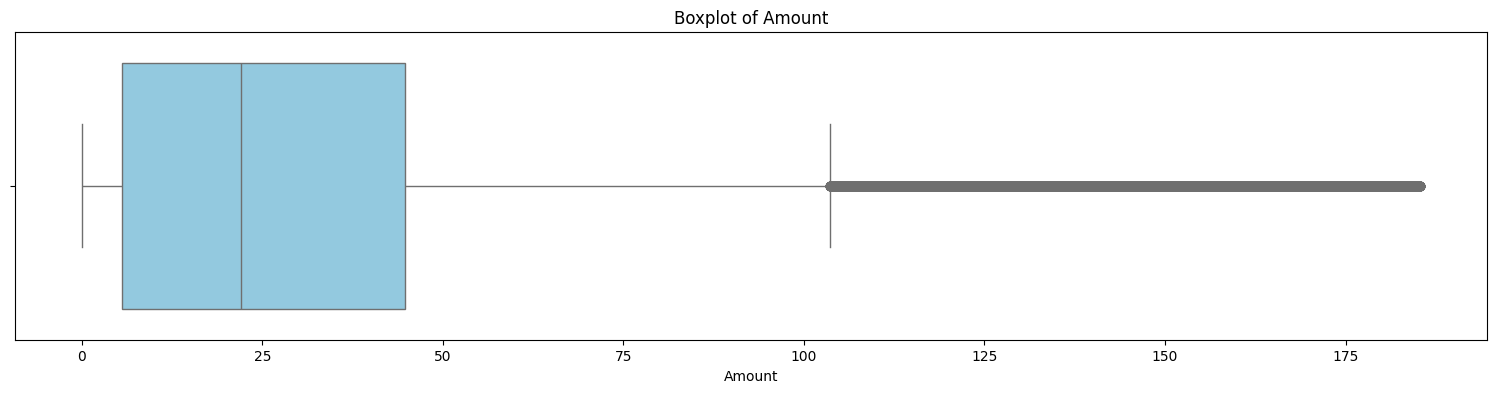

In [848]:
#plot the data after remove outliers
for feature in numerical_columns:
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=new_df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

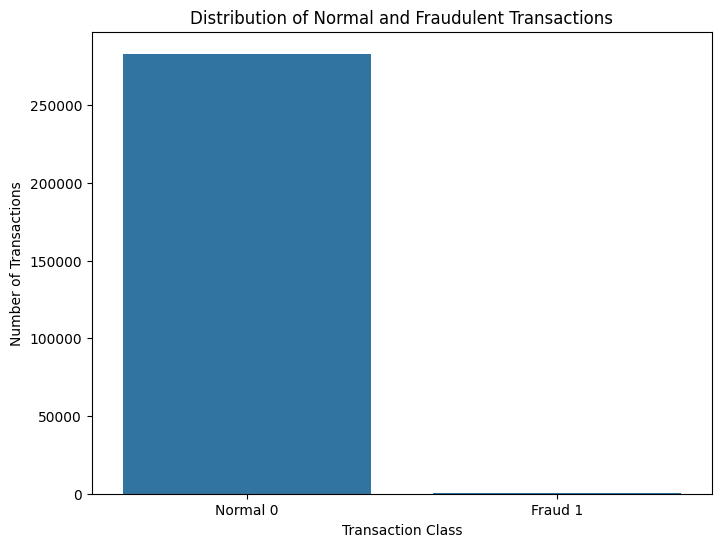

In [849]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=new_df)
plt.xticks([0, 1], ['Normal 0', 'Fraud 1'])
plt.xlabel('Transaction Class')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Normal and Fraudulent Transactions')
plt.show()

In [850]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,-0.011159,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,22.00
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,0.020384,0.063949,0.179963,-2.066656,-0.053468,-0.275168,0.040859,0.021898,1.914428,...,-0.062353,0.213454,0.111864,-0.011159,-0.509348,0.016278,0.250034,0.001479,0.011288,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,-0.053468,-0.275168,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [851]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [852]:
y.unique()

array([0, 1])

In [853]:
#make under sampling on the data
rus = RandomUnderSampler(random_state=0)
X_under_sampled, y_undersampled = rus.fit_resample(X,y)

In [854]:
#concat the x,y in one date : resampled
reasmpled_data=pd.concat([X_under_sampled,y_undersampled], axis=1)
reasmpled_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152837,97479.0,0.092156,0.272981,1.656911,-0.854493,0.459432,0.767503,0.282621,-0.503805,2.349922,...,-0.137865,0.275967,-0.068832,0.250465,-0.892696,0.218579,0.001479,0.011288,15.95,0
150956,94234.0,1.948202,0.867320,-0.969016,-0.022248,0.863555,-0.458733,0.632275,-0.438254,-0.012839,...,-0.158272,-0.077936,0.080232,-0.076259,0.238845,-0.020963,-0.083588,-0.063415,14.41,0
60093,49154.0,-0.290276,1.114285,1.212012,1.440584,0.709091,-0.223777,0.928579,0.002250,-1.190174,...,0.044747,0.065570,0.254539,0.043715,-1.187721,-0.518211,0.217040,0.240874,21.32,0
18917,29864.0,1.296173,0.222813,0.300526,0.505761,-0.256793,-0.713327,0.035844,-0.161200,0.112266,...,-0.293005,-0.853750,0.077961,-0.125926,0.276739,0.126274,-0.031041,0.013411,1.29,0
178797,123787.0,-2.776457,2.609555,0.804440,2.407642,-0.274423,0.840193,-0.325897,1.088946,-1.384043,...,0.059385,-0.409914,0.048440,-0.472746,-0.375670,-0.489655,0.001479,-0.171462,23.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,0.179963,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,-0.011159,-0.294885,0.537503,0.788395,0.292680,0.147968,22.00,1
280143,169347.0,1.378559,1.289381,0.179963,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.001479,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,0.021898,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.001479,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,0.179963,1.817092,-0.840618,-0.275168,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.001479,0.011288,22.00,1


In [855]:
reasmpled_data.Class.unique()

array([0, 1])

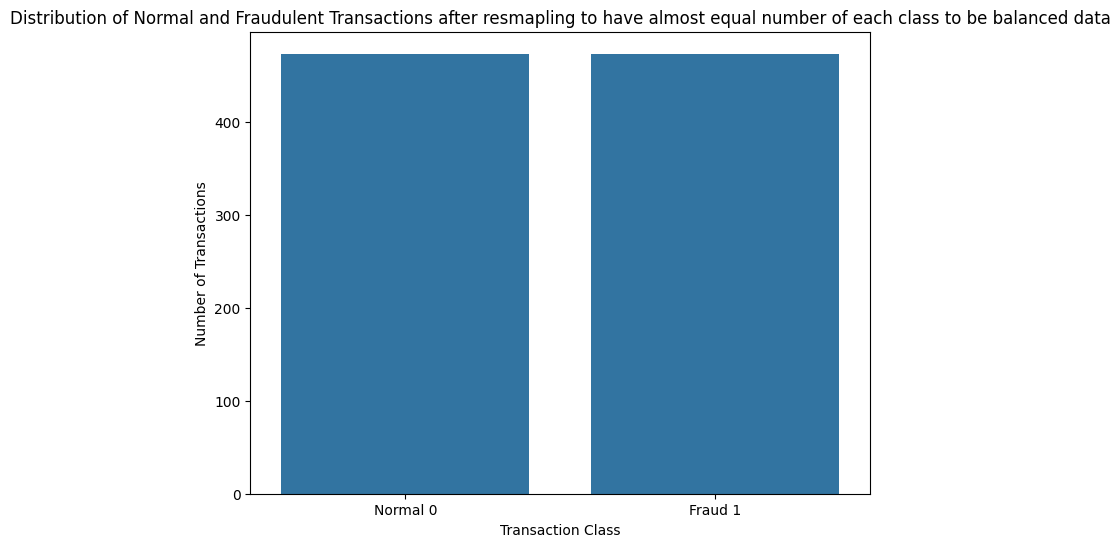

In [856]:
#plot after under sampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=reasmpled_data)
plt.xticks([0, 1], ['Normal 0', 'Fraud 1'])
plt.xlabel('Transaction Class')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Normal and Fraudulent Transactions after resmapling to have almost equal number of each class to be balanced data')
plt.show()

In [857]:
reasmpled_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

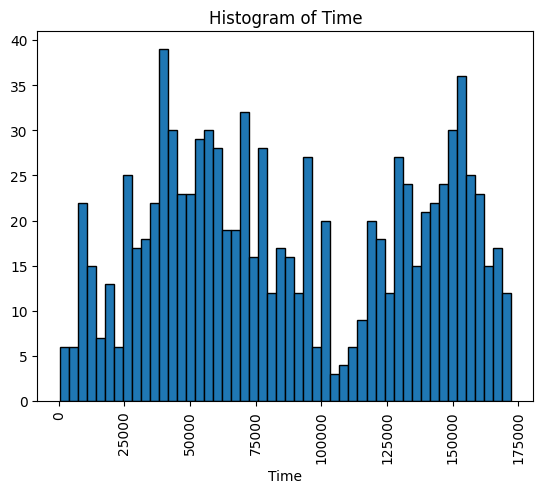

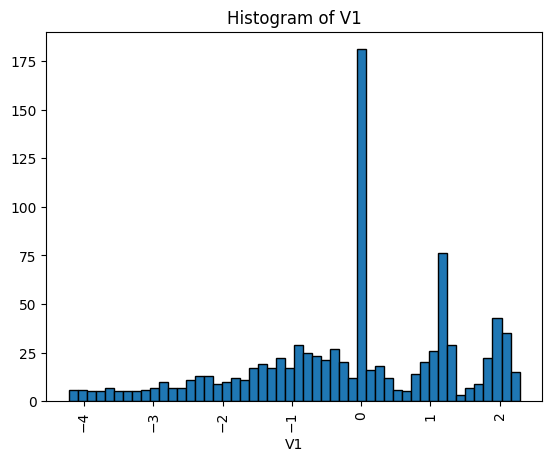

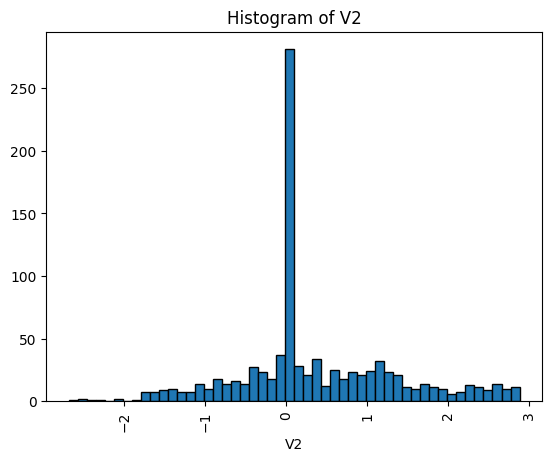

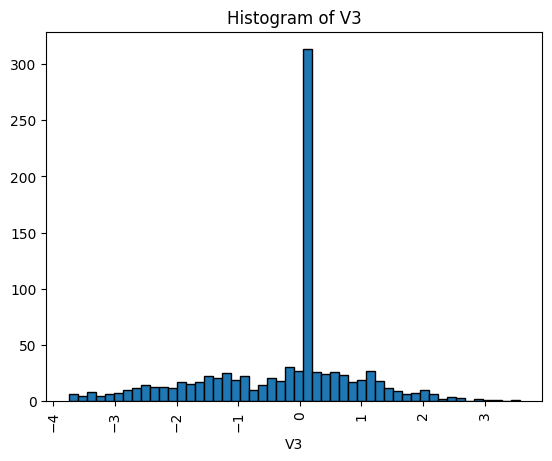

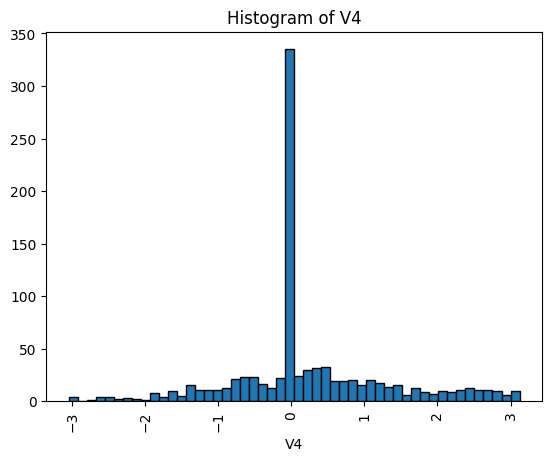

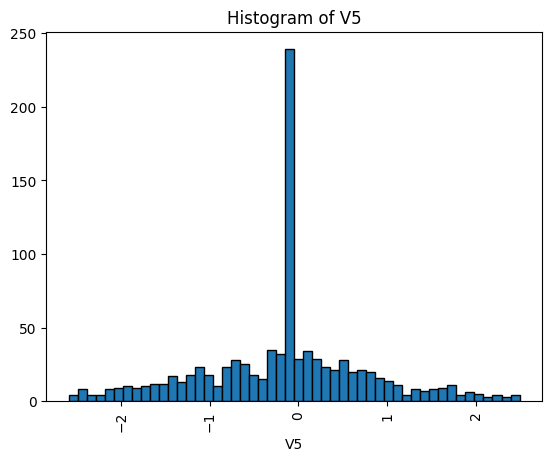

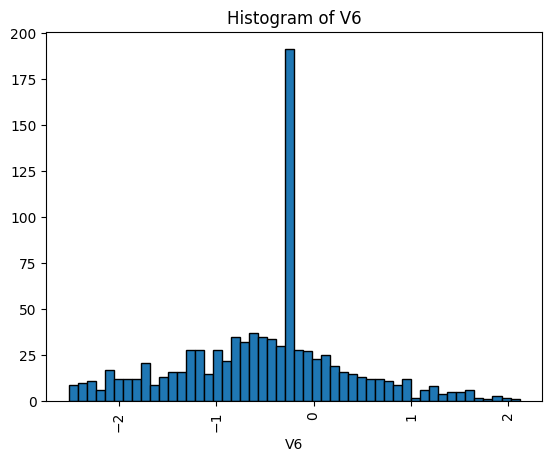

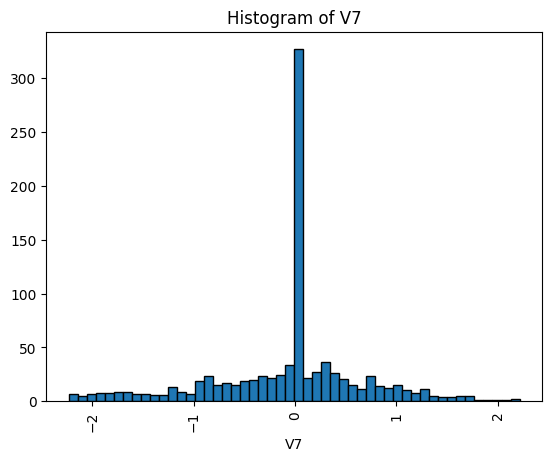

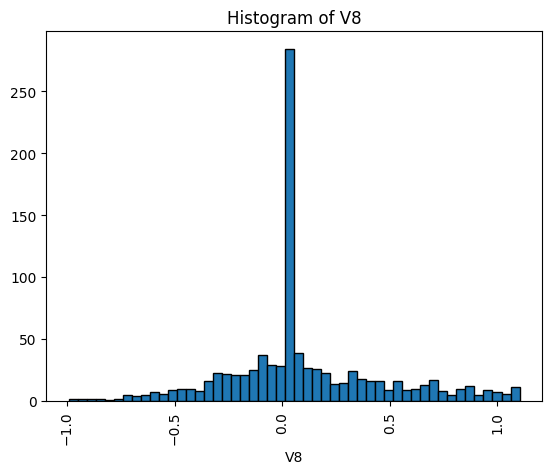

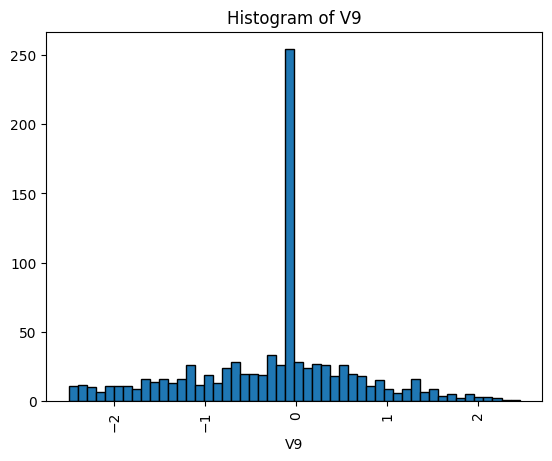

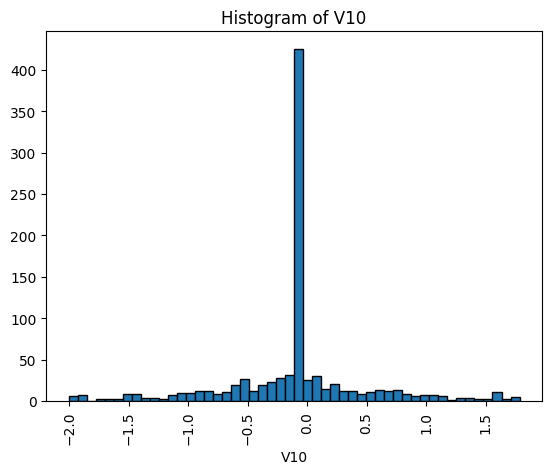

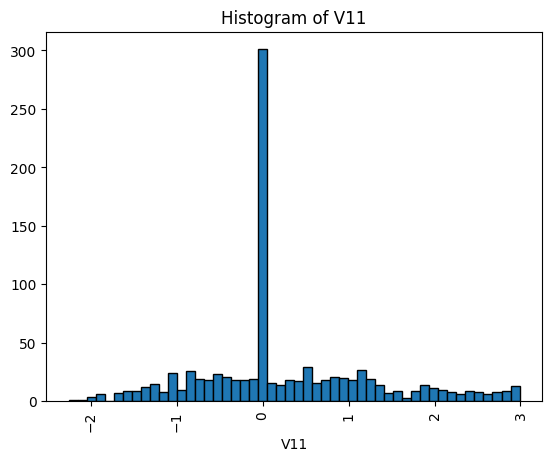

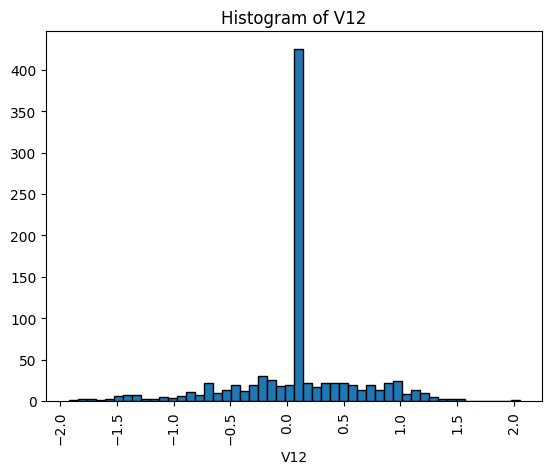

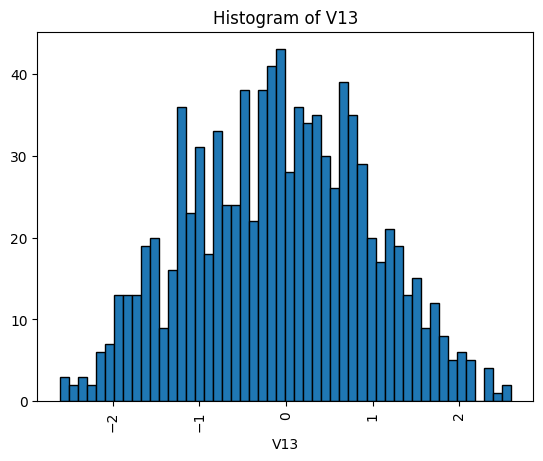

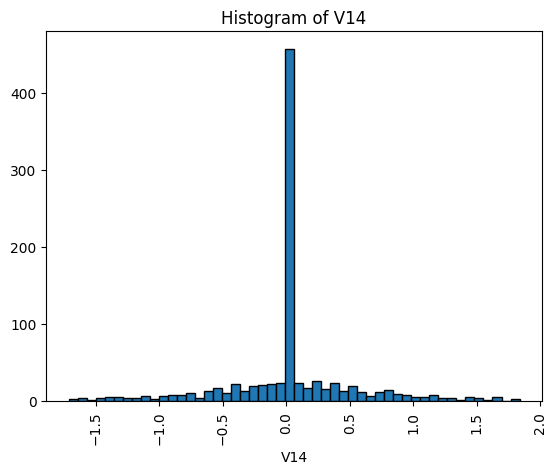

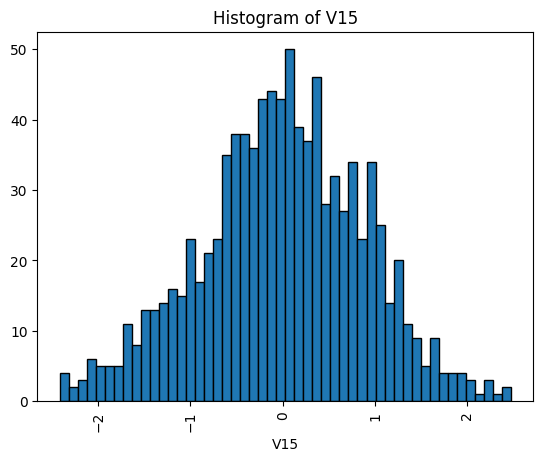

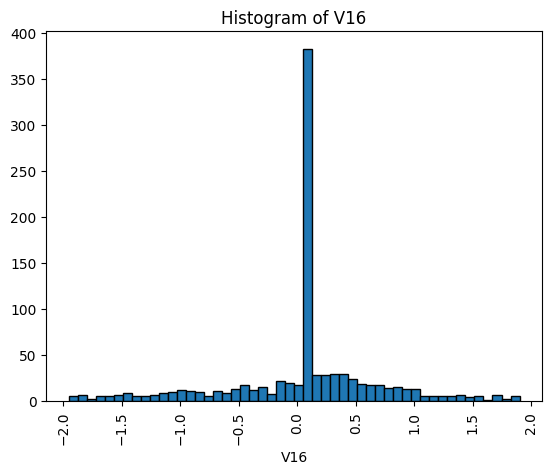

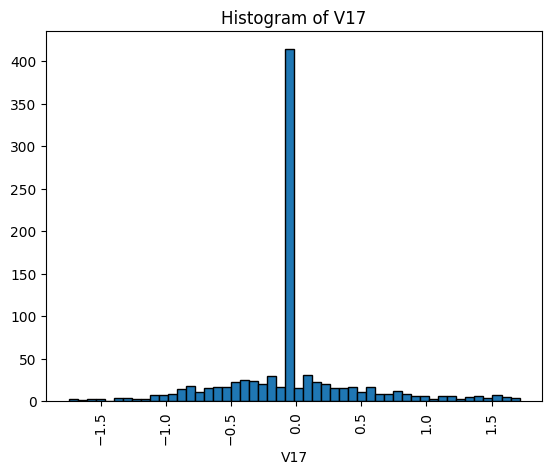

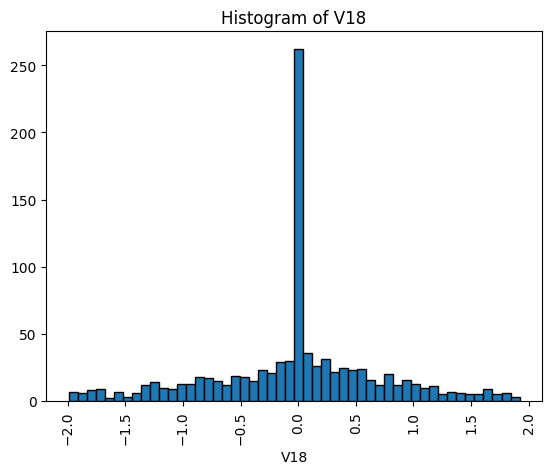

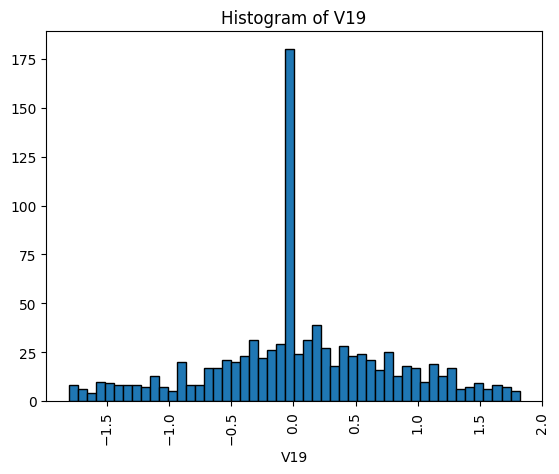

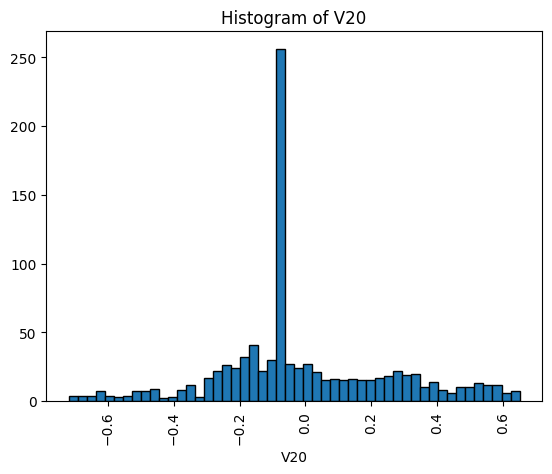

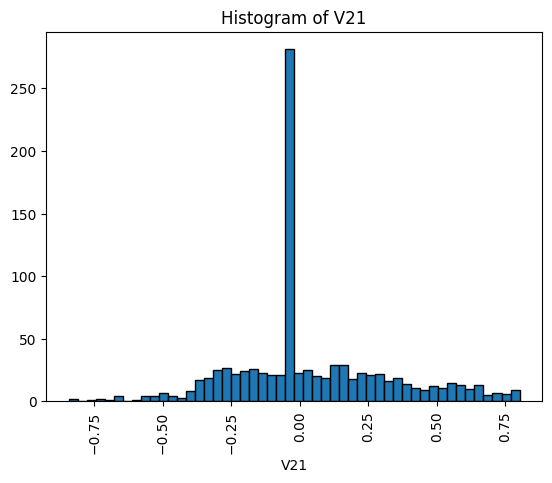

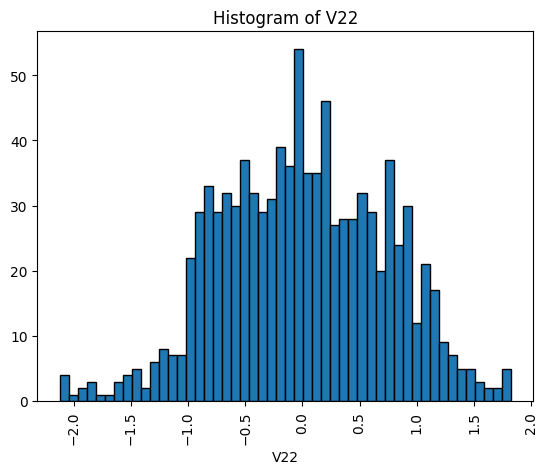

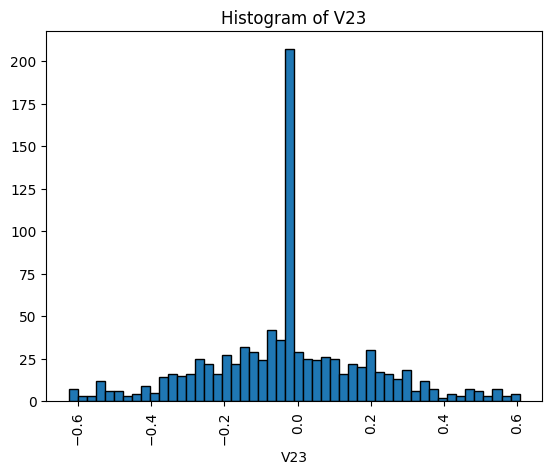

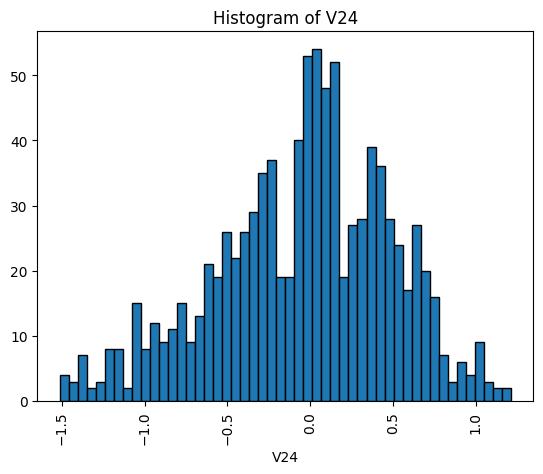

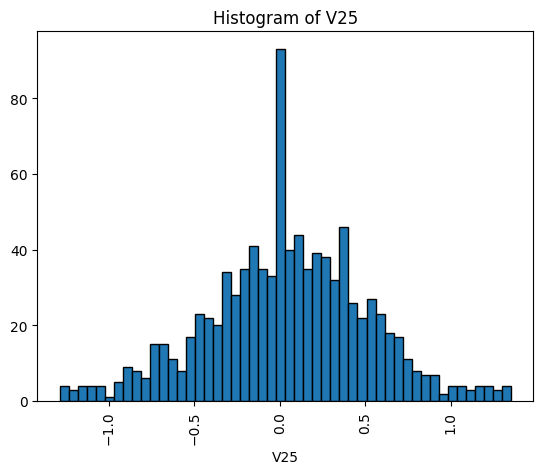

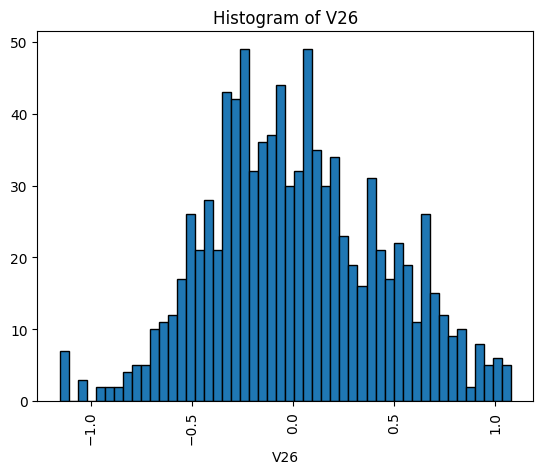

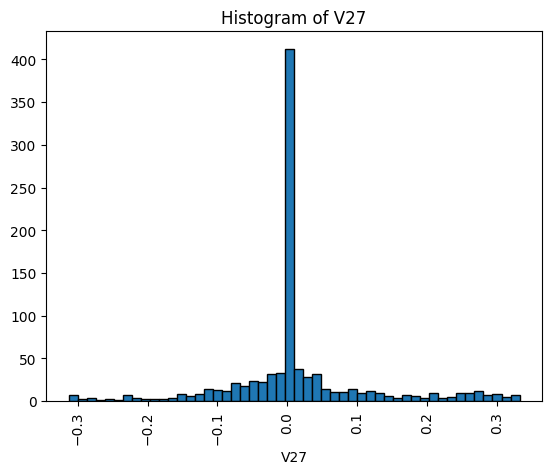

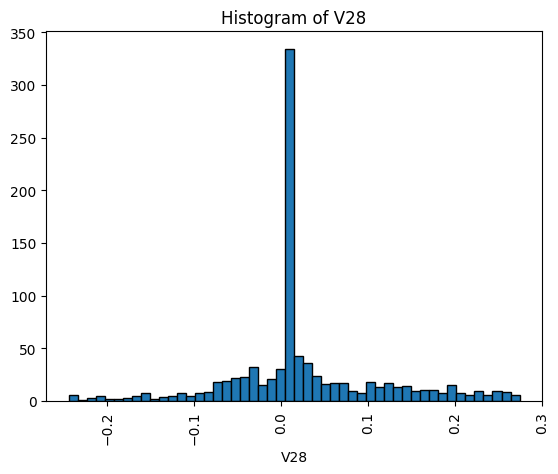

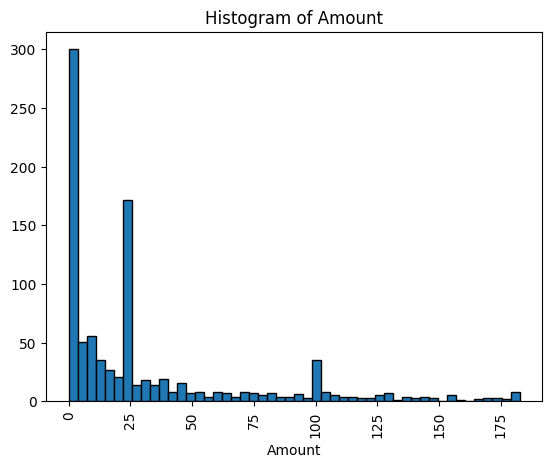

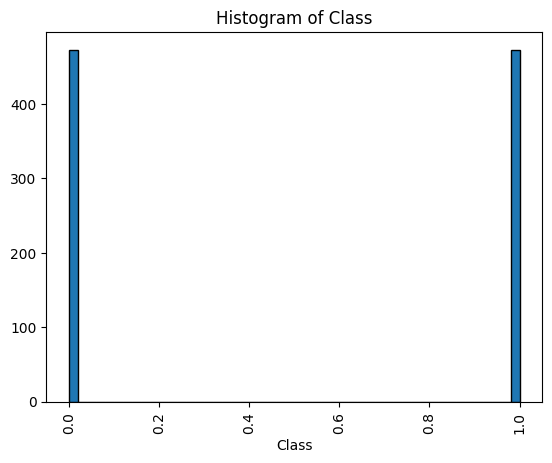

In [858]:
for col in reasmpled_data.columns:
    plt.hist(reasmpled_data[col], bins=50, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

In [859]:
reasmpled_data.Class.unique()

array([0, 1])

In [860]:
reasmpled_data.Class.value_counts()

,count
Class,
0,473
1,473


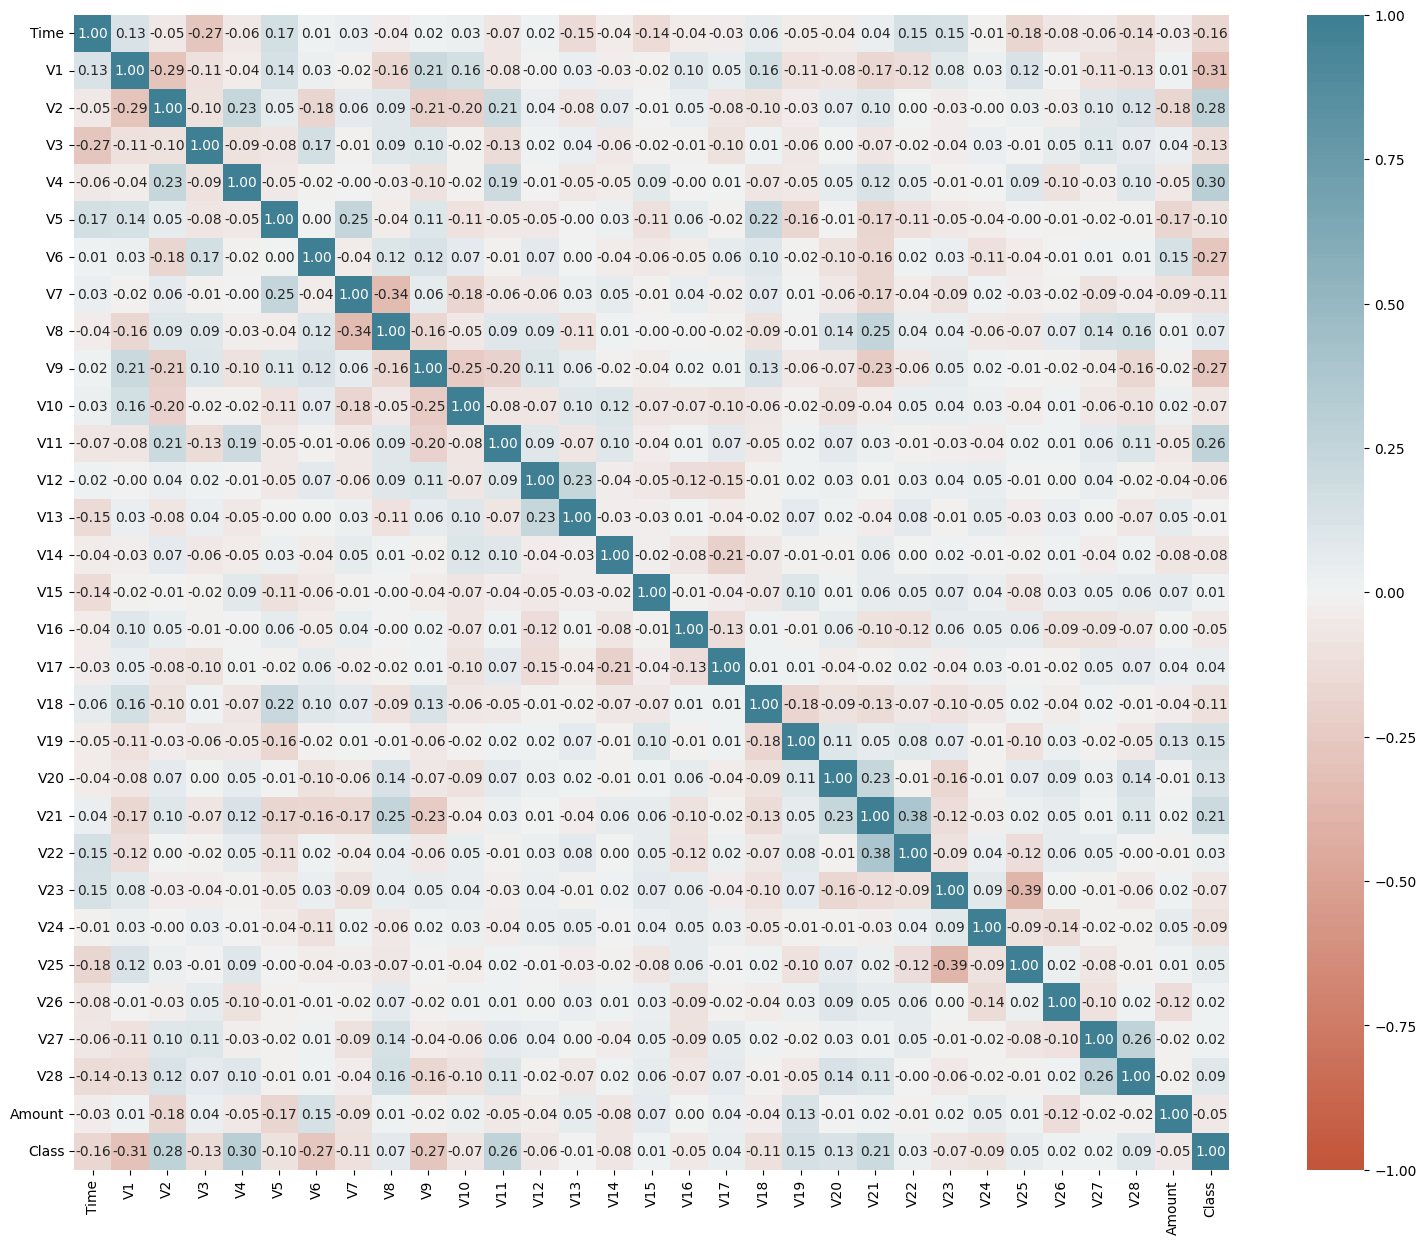

In [861]:
correlation_matrix = reasmpled_data.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    fmt=".2f",
    annot=True
)

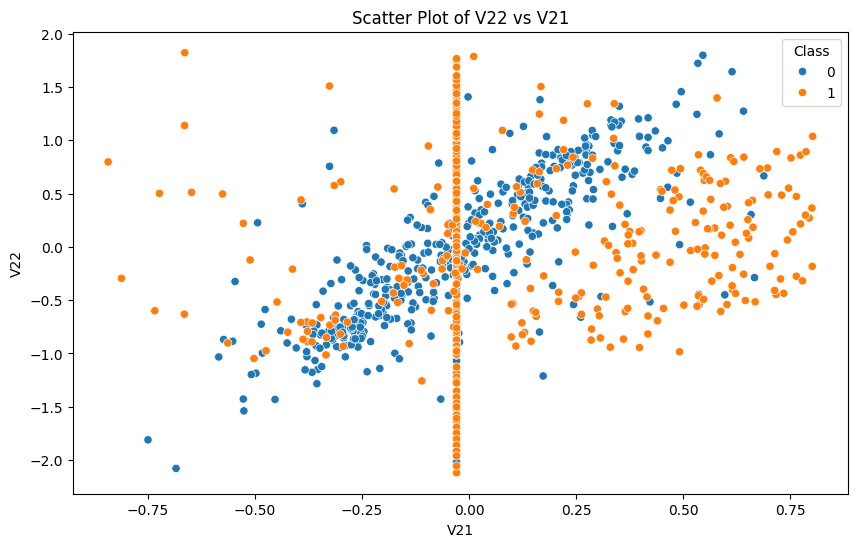

In [890]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V21', y='V22', data=reasmpled_data, hue='Class')
plt.title('Scatter Plot of V22 vs V21')
plt.xlabel('V21')
plt.ylabel('V22')
plt.show()

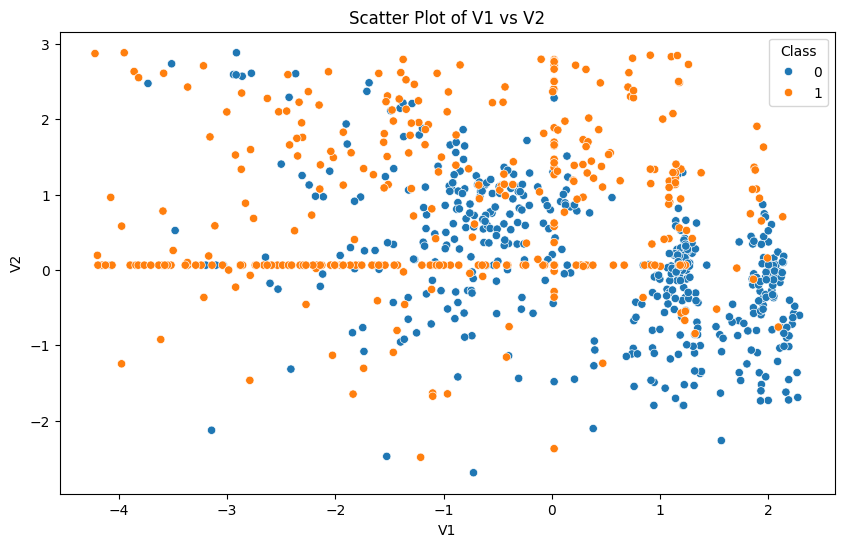

In [891]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V1', y='V2', data=reasmpled_data, hue='Class')
plt.title('Scatter Plot of V1 vs V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

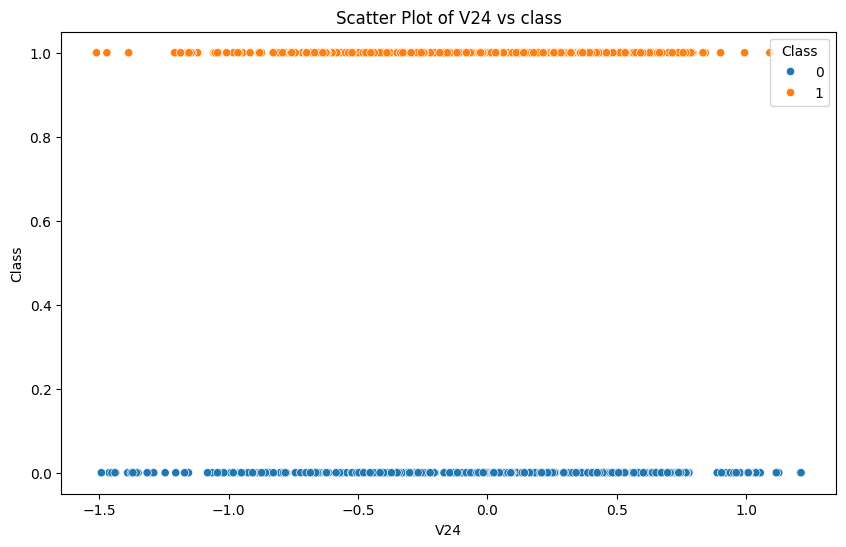

In [892]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V24', y='Class', data=reasmpled_data, hue='Class')
plt.title('Scatter Plot of V24 vs class')
plt.xlabel('V24')
plt.ylabel('Class')
plt.show()

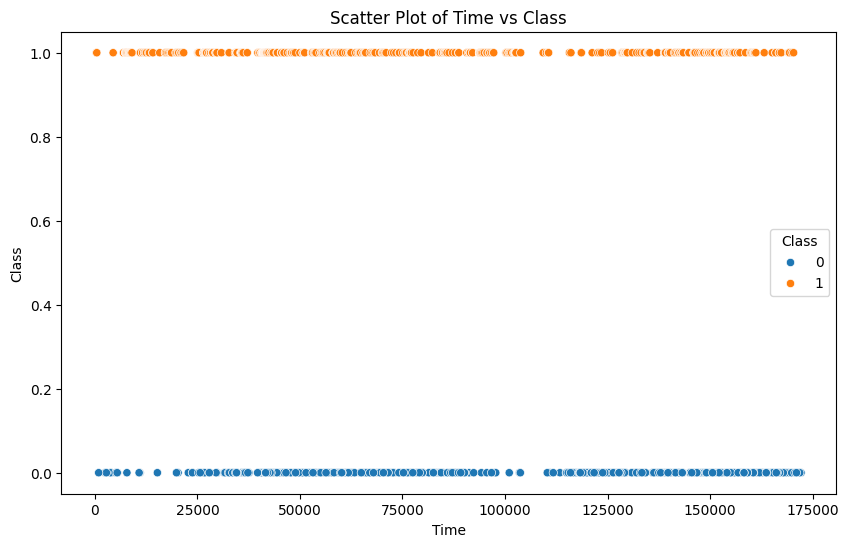

In [884]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Class', data=reasmpled_data, hue='Class')
plt.title('Scatter Plot of Time vs Class')
plt.xlabel('Time')
plt.ylabel('Class')
plt.show()

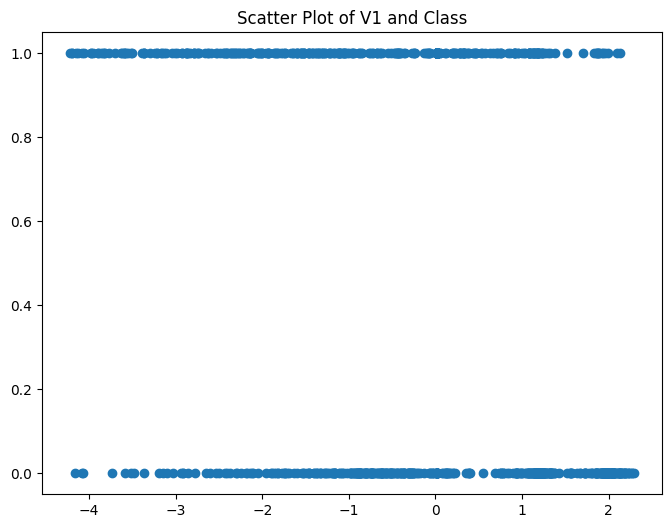

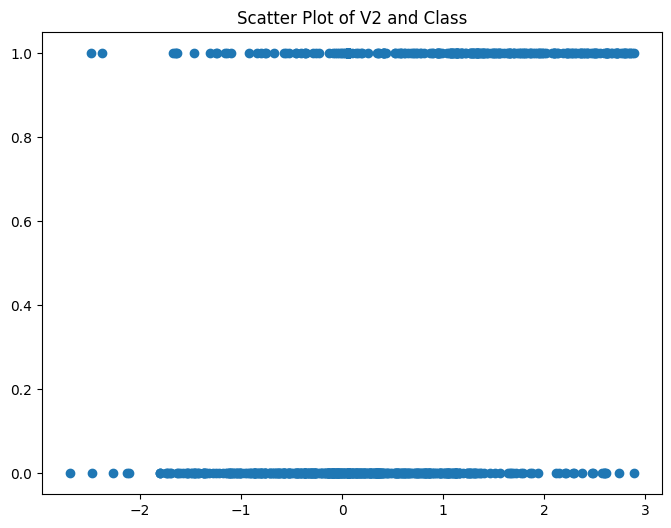

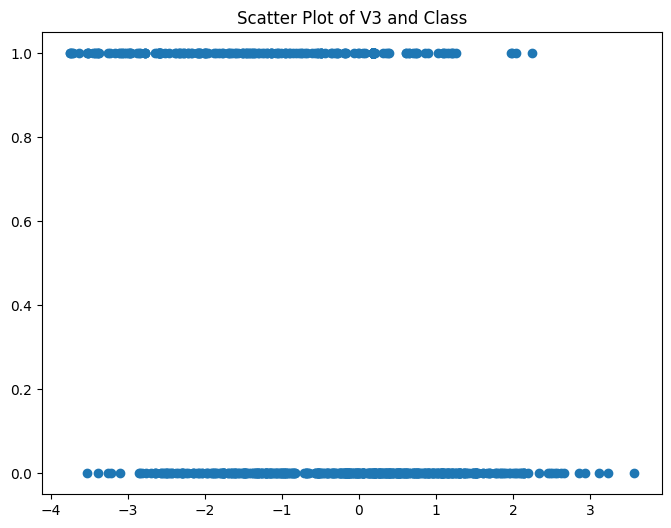

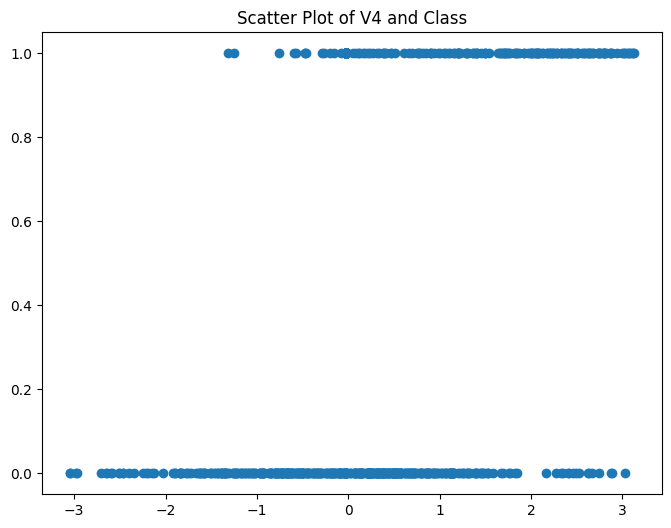

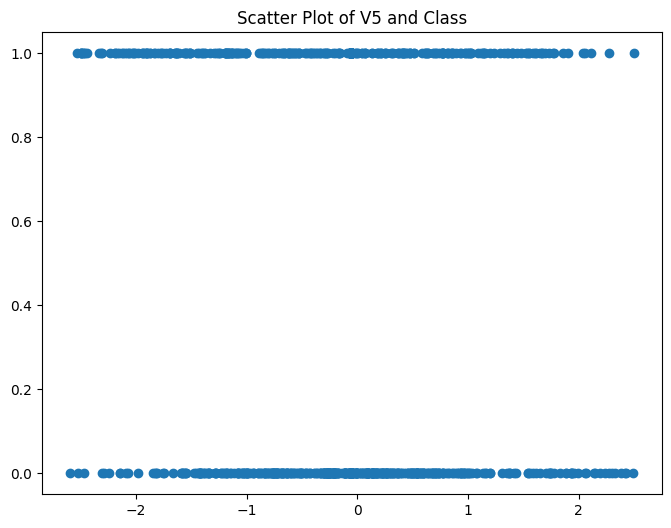

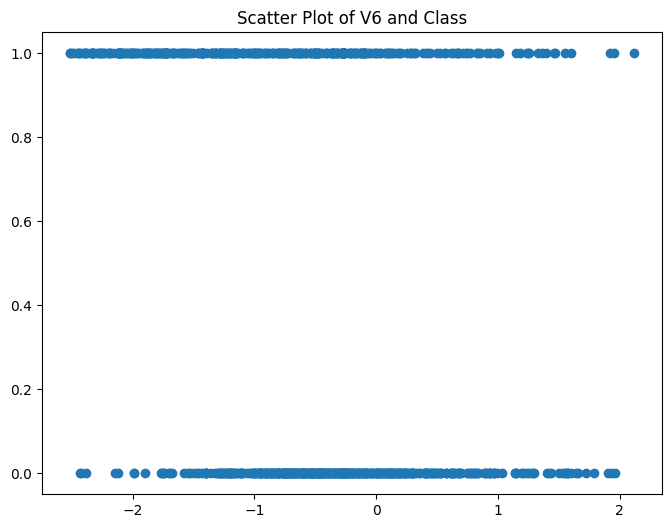

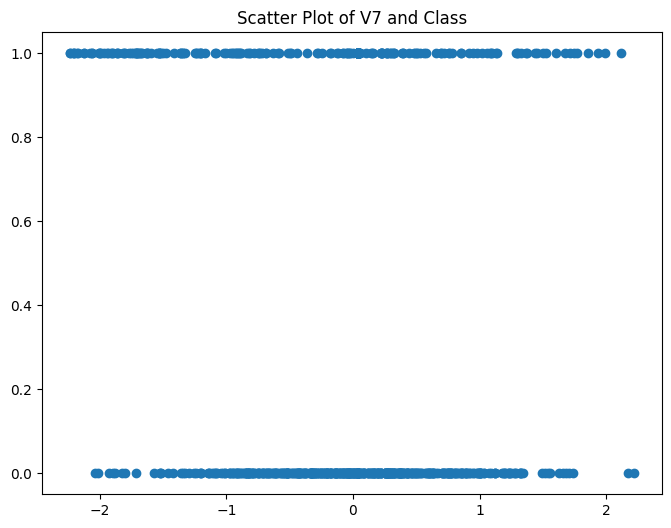

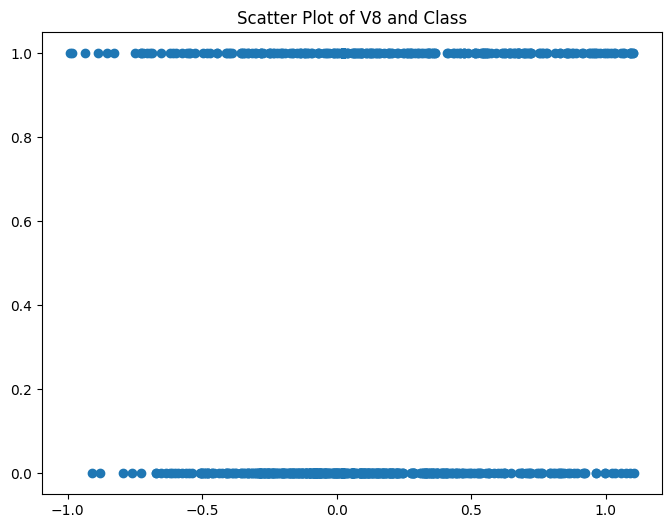

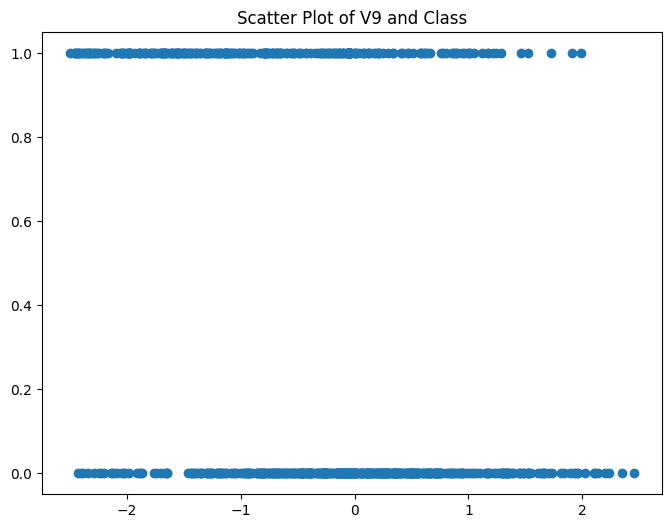

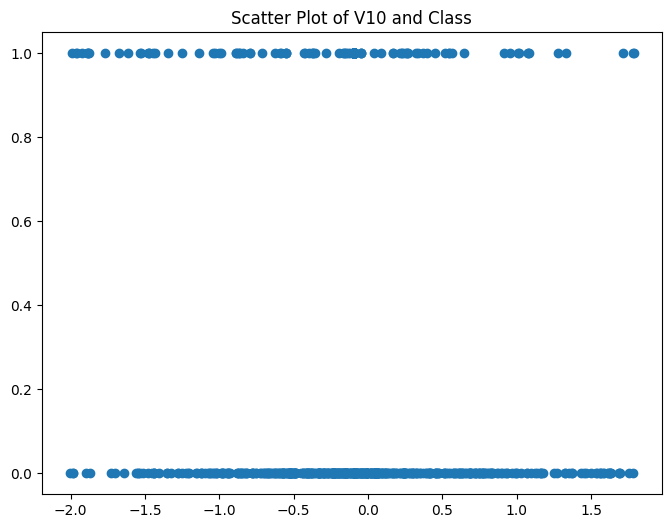

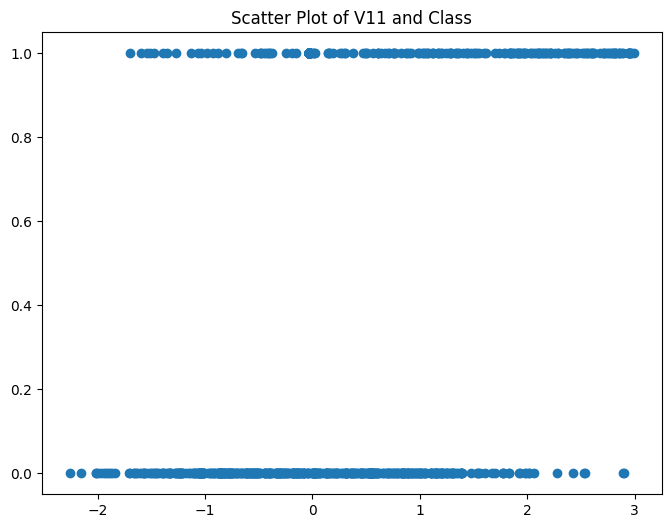

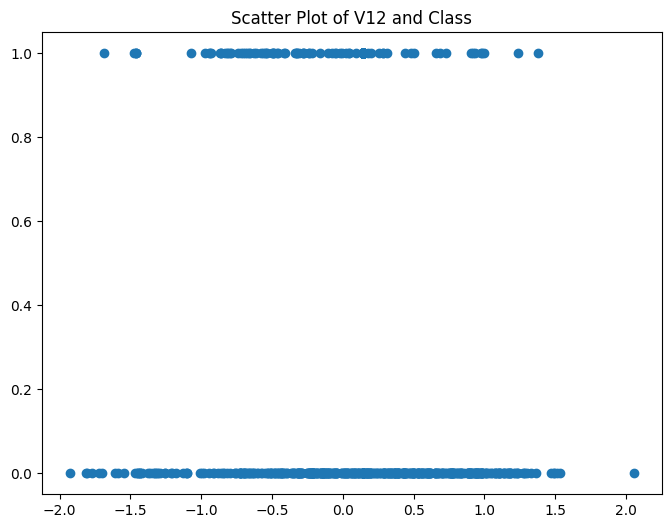

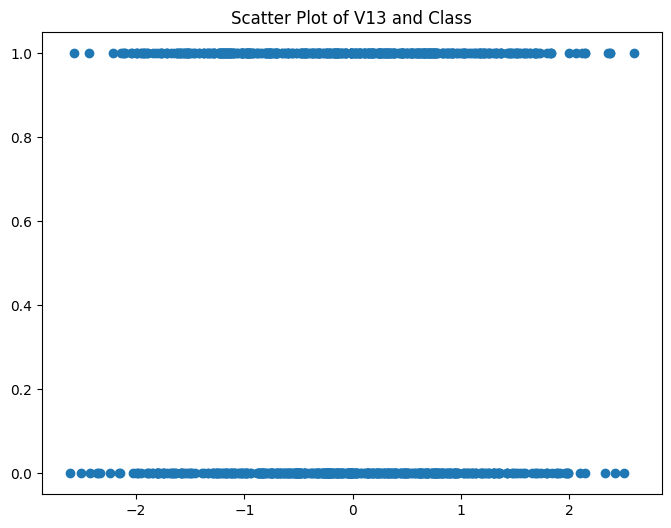

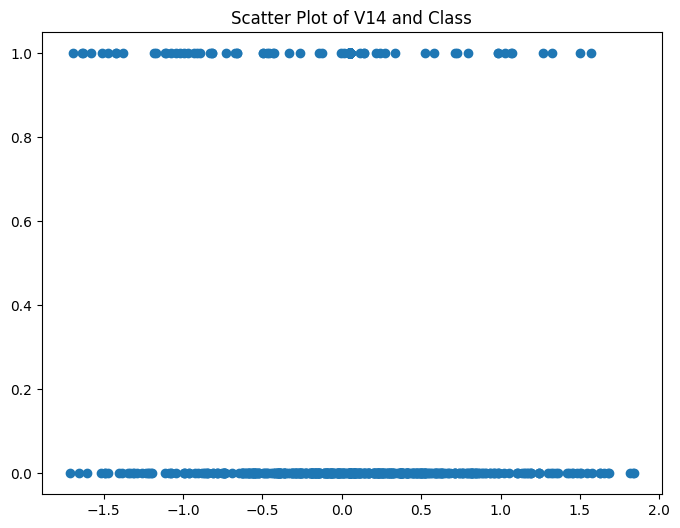

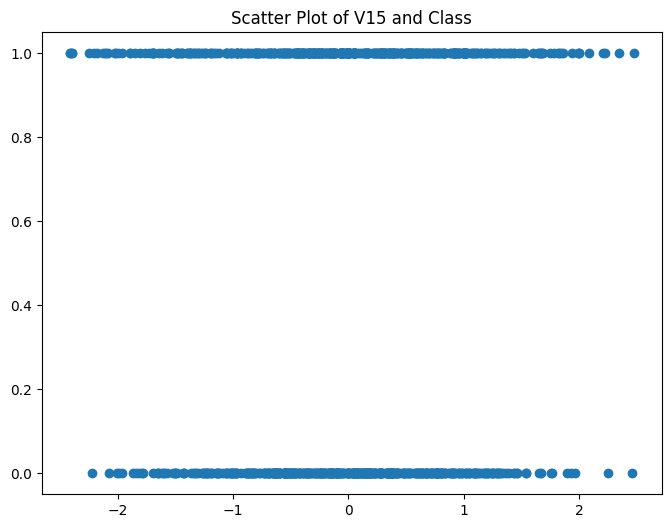

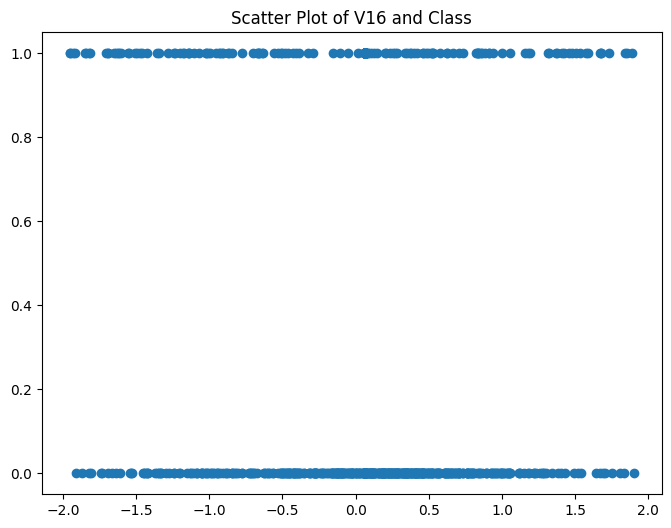

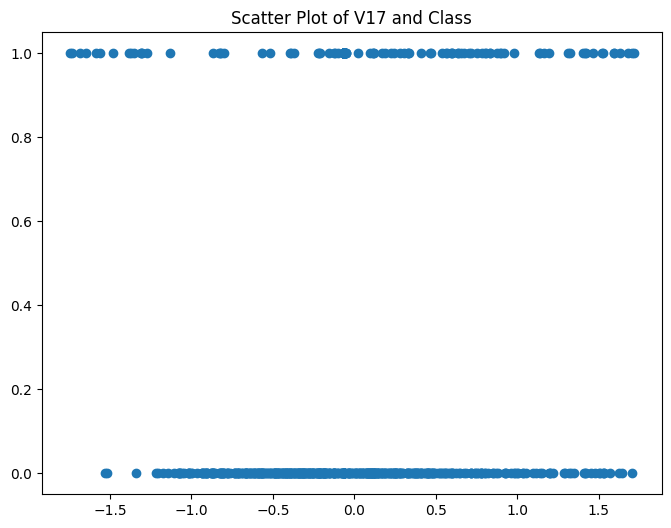

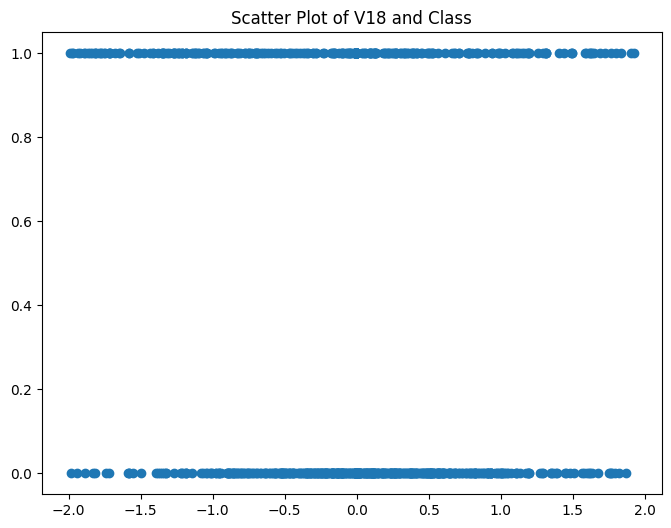

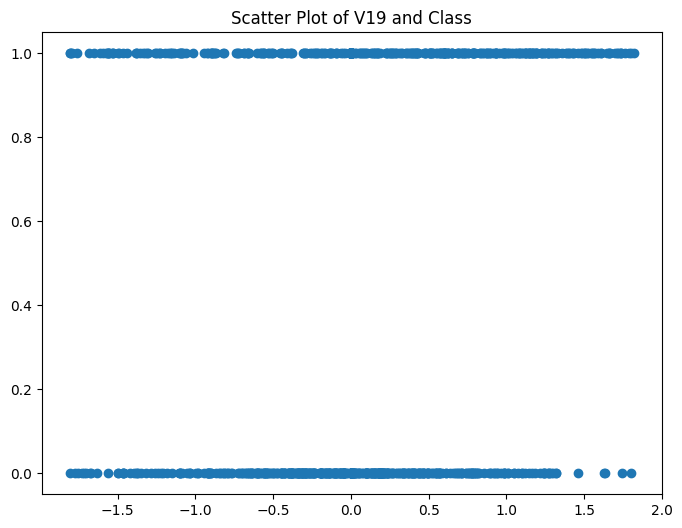

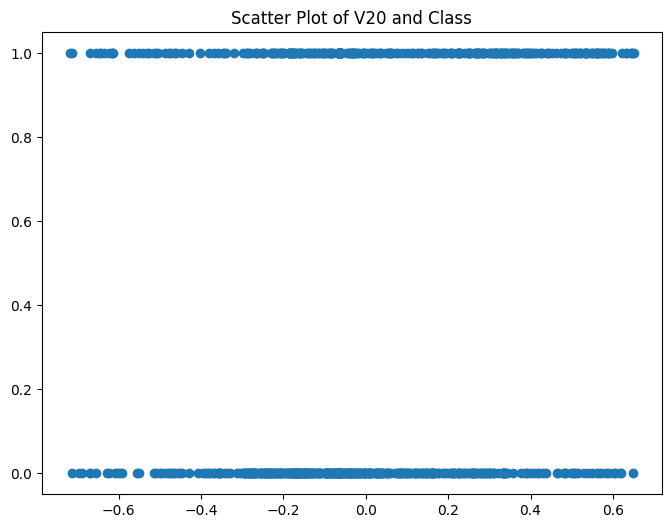

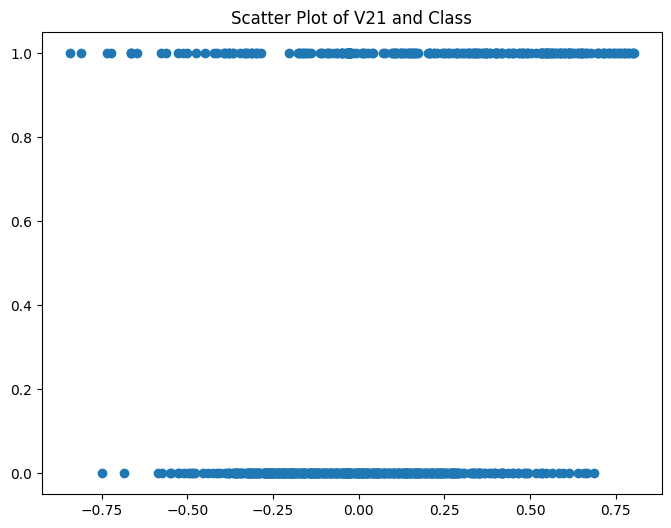

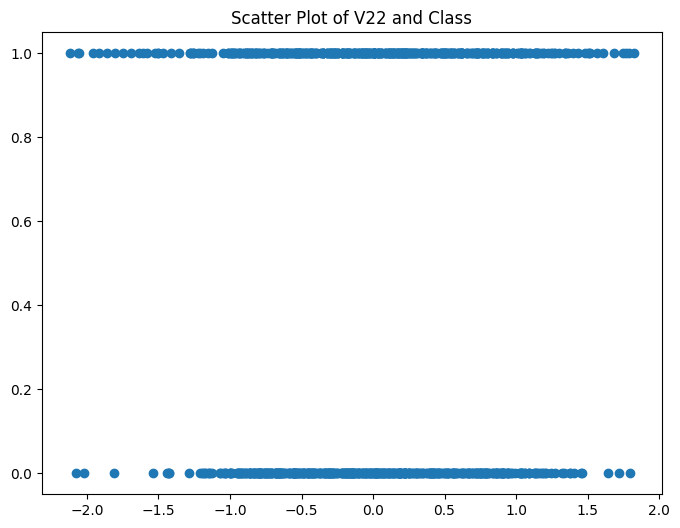

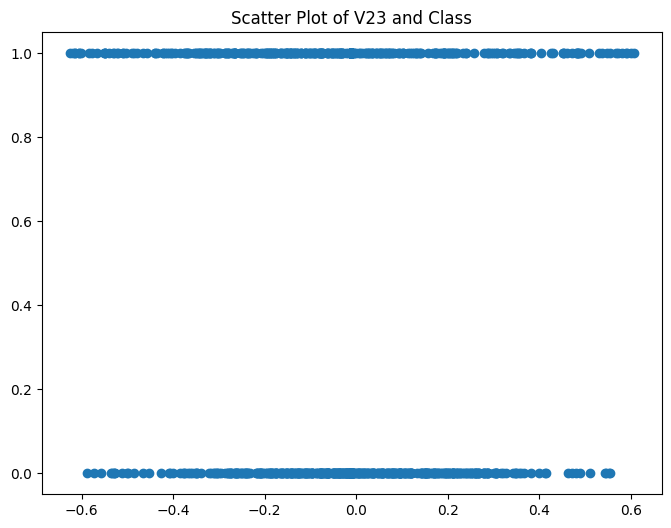

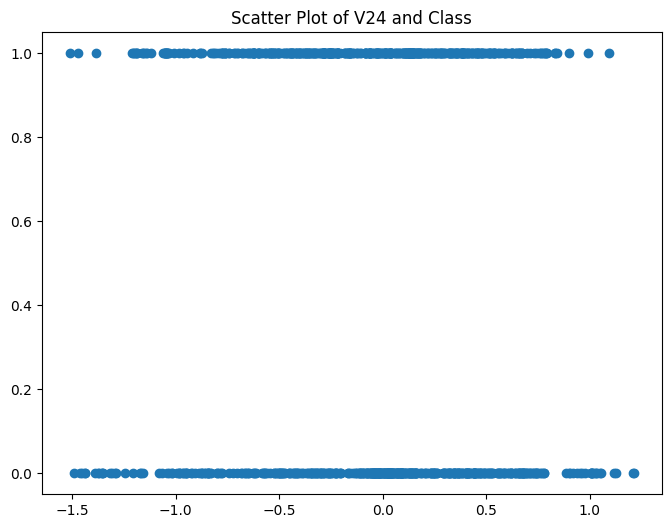

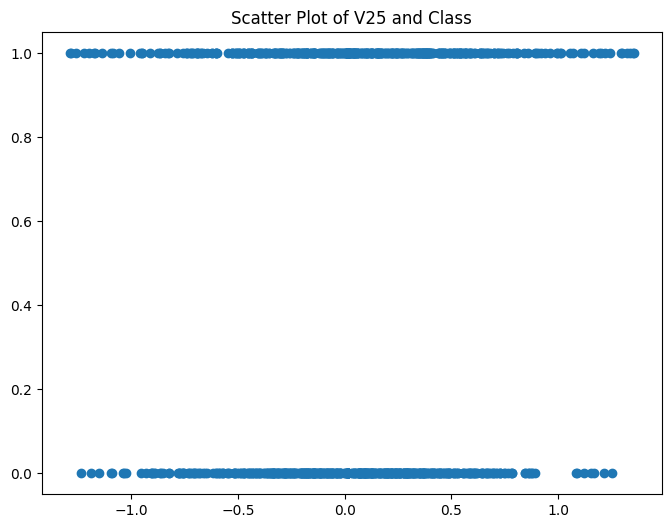

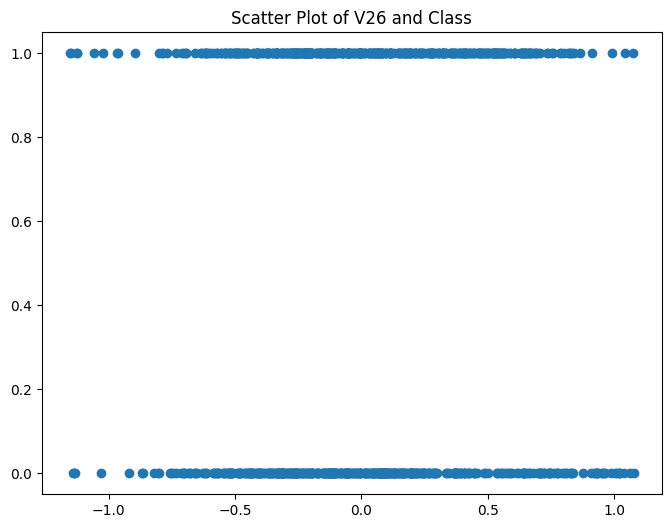

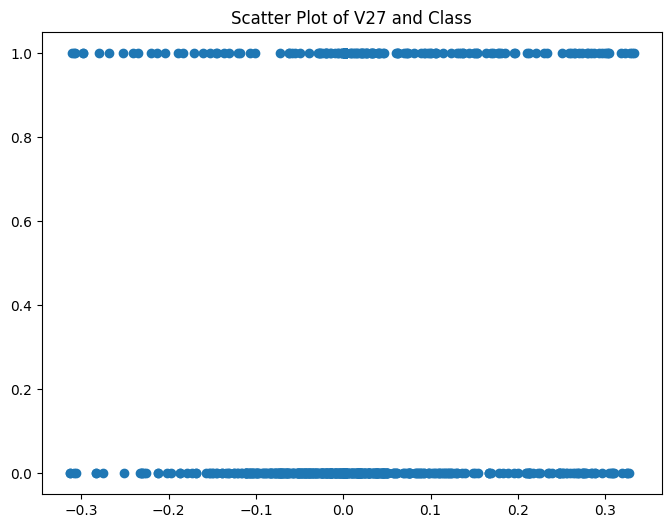

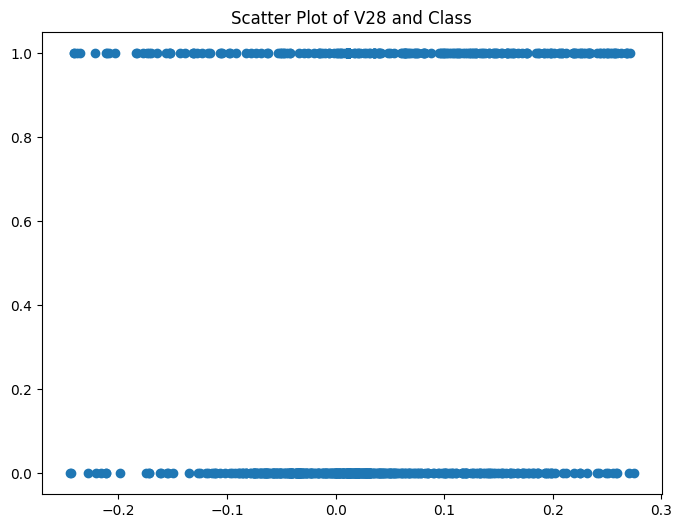

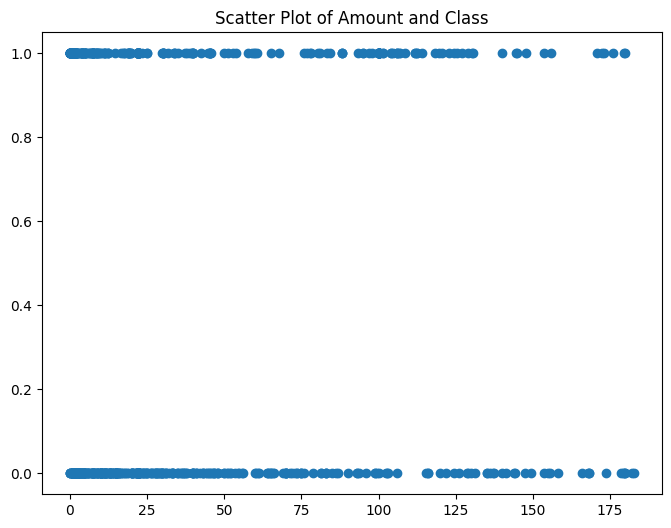

In [865]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(reasmpled_data[col], reasmpled_data['Class'])
    plt.title(f'Scatter Plot of {col} and Class')
    plt.show()

In [866]:
X = reasmpled_data.drop('Class', axis=1)
y = reasmpled_data['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
152837,97479.0,0.092156,0.272981,1.656911,-0.854493,0.459432,0.767503,0.282621,-0.503805,2.349922,...,0.041985,-0.137865,0.275967,-0.068832,0.250465,-0.892696,0.218579,0.001479,0.011288,15.95
150956,94234.0,1.948202,0.867320,-0.969016,-0.022248,0.863555,-0.458733,0.632275,-0.438254,-0.012839,...,-0.275892,-0.158272,-0.077936,0.080232,-0.076259,0.238845,-0.020963,-0.083588,-0.063415,14.41
60093,49154.0,-0.290276,1.114285,1.212012,1.440584,0.709091,-0.223777,0.928579,0.002250,-1.190174,...,-0.185729,0.044747,0.065570,0.254539,0.043715,-1.187721,-0.518211,0.217040,0.240874,21.32
18917,29864.0,1.296173,0.222813,0.300526,0.505761,-0.256793,-0.713327,0.035844,-0.161200,0.112266,...,-0.092125,-0.293005,-0.853750,0.077961,-0.125926,0.276739,0.126274,-0.031041,0.013411,1.29
178797,123787.0,-2.776457,2.609555,0.804440,2.407642,-0.274423,0.840193,-0.325897,1.088946,-1.384043,...,-0.450856,0.059385,-0.409914,0.048440,-0.472746,-0.375670,-0.489655,0.001479,-0.171462,23.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,0.179963,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,-0.062353,0.778584,-0.319189,-0.011159,-0.294885,0.537503,0.788395,0.292680,0.147968,22.00
280143,169347.0,1.378559,1.289381,0.179963,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.001479,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,0.021898,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.001479,0.194361,77.89
281144,169966.0,-3.113832,0.585864,0.179963,1.817092,-0.840618,-0.275168,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.001479,0.011288,22.00


In [867]:
y

,Class
152837,0
150956,0
60093,0
18917,0
178797,0
...,...
279863,1
280143,1
280149,1
281144,1


In [868]:
#scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [869]:
X_scaled

array([[ 0.18950351,  0.17949288, -0.09586149, ..., -0.12044877,
        -0.17608086, -0.36728977],
       [ 0.12259777,  1.40277591,  0.49713069, ..., -0.9282082 ,
        -0.99213082, -0.40448521],
       [-0.80686632, -0.07256044,  0.74353483, ...,  1.92644022,
         2.33192845, -0.23758879],
       ...,
       [ 1.67136782, -0.32687746,  0.75558898, ..., -0.12044877,
         1.82382676,  1.12873978],
       [ 1.68404795, -1.93350999,  0.21631269, ..., -0.12044877,
        -0.17608086, -0.22116483],
       [ 1.69192407,  1.4316268 , -0.21010648, ..., -0.10611998,
        -0.46662138,  0.27469385]])

In [870]:
X_scaled.shape

(946, 30)

In [871]:
reasmpled_data['Class'].shape

(946,)

In [872]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

*KNN*

In [873]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [874]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [875]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8894736842105263

In [876]:
precision = precision_score(y_test, y_pred, average='binary')
print("precision",precision)
recall = recall_score(y_test, y_pred, average='binary')
print("recall",recall)
f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score",f1)

precision 0.8932038834951457
recall 0.9019607843137255
f1_score 0.8975609756097561


*LogisticRegression*

In [877]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [878]:
model = LogisticRegression(max_iter = 1500)

In [879]:
model.fit(x_train, y_train)

predictions = model.predict(x_test)

accuracy_score(predictions, y_test)

0.7947368421052632

In [885]:
precision = precision_score(y_test, predictions, average='binary')
print("precision",precision)
recall = recall_score(y_test, predictions, average='binary')
print("recall",recall)
f1 = f1_score(y_test, predictions, average='binary')
print("f1_score",f1)

precision 0.8333333333333334
recall 0.7368421052631579
f1_score 0.7821229050279329


accuracy on knn is better than LogisticRegression